# 1. Import All Necessary Libraries and Create File Paths

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import random

# Plotting
import matplotlib.pyplot as plt

# Modelling CNN|
import tensorflow as tf
import glob
import math
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import math
import datetime
from keras import backend as K
import tensorboard as tb

In [2]:
# folder path or file path constants that will be used in this project
# Root Directory (between 'F:' or 'D:'' depends on the external drive)
ROOT = "D:\\"

# Folder inside D:\\wildfire-sumatera-dataset
WILDFIRE_SUMATERA_DATASET_FOLDER_PATH = os.path.join(ROOT, 'wildfire-sumatera-dataset')


# Folders and metadatas inside D:\\wildfire-sumatera-dataset
WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-geotiff')
WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image')
WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image-mask')
WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image-mask-tfrecords')

# Files (.csv) and metadatas inside D:\\wildfire-sumatera-dataset
METADATA_LANDSAT_8_FILE_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'metadata_landsat_8.csv')
METADATA_SENTINEL_2_FILE_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'metadata_sentinel_2.csv')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff
SENTINEL_2_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 'landsat-8')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-image
SENTINEL_2_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH, 'landsat-8')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8
LANDSAT_8_PREFIRE_GEOTIFF_FOLDER_PATH = os.path.join(LANDSAT_8_GEOTIFF_FOLDER_PATH, 'prefire')
LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH = os.path.join(LANDSAT_8_GEOTIFF_FOLDER_PATH, 'postfire')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\sentinel-2
SENTINEL_2_PREFIRE_GEOTIFF_FOLDER_PATH = os.path.join(SENTINEL_2_GEOTIFF_FOLDER_PATH, 'prefire')
SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH = os.path.join(SENTINEL_2_GEOTIFF_FOLDER_PATH, 'postfire')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-image-mask
SENTINEL_2_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH, 'landsat-8')

# Folders inside
SENTINEL_2_B12_B8_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH, 'sentinel-2_b12_b8_b2')
LANDSAT_8_B7_B5_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH, 'landsat-8_b7_b5_b2')
SENTINEL_2_B4_B3_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH, 'sentinel-2_b4_b3_b2')
LANDSAT_8_B4_B3_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH, 'landsat-8_b4_b3_b2')


dirs = [
    WILDFIRE_SUMATERA_DATASET_FOLDER_PATH,
    WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 
    WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH,
    WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH,
    WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH,
    
    SENTINEL_2_GEOTIFF_FOLDER_PATH, 
    LANDSAT_8_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_IMAGE_FOLDER_PATH,
    LANDSAT_8_IMAGE_FOLDER_PATH,
    
    LANDSAT_8_PREFIRE_GEOTIFF_FOLDER_PATH,
    LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_PREFIRE_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH,
    
    SENTINEL_2_IMAGE_MASK_FOLDER_PATH,
    LANDSAT_8_IMAGE_MASK_FOLDER_PATH,
    
    SENTINEL_2_B12_B8_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH,
    LANDSAT_8_B7_B5_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH,
    SENTINEL_2_B4_B3_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH,
    LANDSAT_8_B4_B3_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH,

]

for dir_ in dirs:
    if not os.path.exists(dir_):
        os.mkdir(dir_)
        print(f"{dir_} has been created")
    else:
        print(f"{dir_} already exist")

D:\wildfire-sumatera-dataset already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask-tfrecords already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image\sentinel-2 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image\landsat-8 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\prefire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\prefire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire already exist
D

# 2. Import Data from Tensorboard Dev

In [3]:
# experiment_id = "VCKTPVIbSlqz8MsaK1REpg"
# experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
# df_b4_b3_b2 = experiment.get_scalars()

# experiment_id = "vRHXyHxDR82W5GG7a0qv5Q"
# experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
# df_b7_b5_b12_b8_b2 = experiment.get_scalars()

# df = pd.concat([df_b4_b3_b2, df_b7_b5_b12_b8_b2], ignore_index=True)
# df.to_csv("logs.csv", index=False)

In [4]:
df = pd.read_csv("logs.csv")

In [5]:
df= df.loc[~(df.tag.str.contains('vs'))]
df.reset_index(drop=True, inplace=True)

In [6]:
df.describe()

,step,value
count,36864.000000,3.686400e+04
mean,8.764540,2.730537e+14
std,5.691878,3.707809e+16
min,0.000000,1.042882e-02
25%,4.000000,3.224735e-01
50%,8.000000,5.238348e-01
75%,14.000000,8.483388e-01
max,19.000000,5.471681e+18


## Create New Column for Each Hyperparameter

In [7]:
# satellite_band column
satellite_band_arr = []
for index, row in df.iterrows():
    if 'landsat_8_b4_b3_b2' in row.run:
        satellite_band_arr.append('landsat_8_b4_b3_b2')
    elif 'landsat_8_b7_b5_b2' in row.run:
        satellite_band_arr.append('landsat_8_b7_b5_b2')
    elif 'sentinel_2_b4_b3_b2' in row.run:
        satellite_band_arr.append('sentinel_2_b4_b3_b2')
    elif 'sentinel_2_b12_b8_b2' in row.run:
        satellite_band_arr.append('sentinel_2_b12_b8_b2')

df = df.assign(satellite_band=satellite_band_arr)
        
count = 0
for index, row in df.iterrows():
    if str(row.satellite_band) in row.run:
        count+=1
print('operation is a success' if len(df) == count else 'operation failed')

# type_run column
df = df.assign(type_run=df.run.apply(
    lambda x: 'validation' if x.endswith('validation') else 'train').to_list())

count = 0
for index, row in df.iterrows():
    if str(row.type_run) in row.run:
        count+=1
print('operation is a success' if len(df) == count else 'operation failed')

# optimizer column
df = df.assign(opt=df.run.apply(lambda x: 'adam' if 'adam' in x else 'rmsprop').to_list())
count = 0
for index, row in df.iterrows():
    if str(row.opt) in row.run:
        count+=1
print('operation is a success' if len(df) == count else 'operation failed')

# learning_rate column
df = df.assign(lr=df.run.apply(lambda x: 0.001 if '0.001' in x else 0.01).to_list())
count = 0
for index, row in df.iterrows():
    if str(row.lr) in row.run:
        count+=1
print('operation is a success' if len(df) == count else 'operation failed')

# batch column
batch_arr = []
for index, row in df.iterrows():
    if 'batch_64' in row.run:
        batch_arr.append(64)
    elif 'batch_32' in row.run:
        batch_arr.append(32)
    elif 'batch_16' in row.run:
        batch_arr.append(16)

df = df.assign(batch=batch_arr)
count = 0
for index, row in df.iterrows():
    if str(row.batch) in row.run:
        count+=1
print('operation is a success' if len(df) == count else 'operation failed')

# starting filters column
df = df.assign(start_filter=df.run.apply(lambda x: 32 if 'filters_32' in x else 16).to_list())
count = 0
for index, row in df.iterrows():
    if str(row.start_filter) in row.run:
        count+=1
print('operation is a success' if len(df) == count else 'operation failed')

# image size column
size_arr = []
for index, row in df.iterrows():
    if 'size_176' in row.run:
        size_arr.append(176)
    elif 'size_144' in row.run:
        size_arr.append(144)
    elif 'size_112' in row.run:
        size_arr.append(112)

df = df.assign(img_size=size_arr)
count = 0
for index, row in df.iterrows():
    if str(row.img_size) in row.run:
        count+=1
print('operation is a success' if len(df) == count else 'operation failed')


df

operation is a success
operation is a success
operation is a success
operation is a success
operation is a success
operation is a success
operation is a success


,run,tag,step,value,satellite_band,type_run,opt,lr,batch,start_filter,img_size
0,fit\landsat_8_b4_b3_b2\unet_model_opt_adam_lr_...,epoch_accuracy,0,0.858952,landsat_8_b4_b3_b2,train,adam,0.001,16,16,112
1,fit\landsat_8_b4_b3_b2\unet_model_opt_adam_lr_...,epoch_accuracy,1,0.870404,landsat_8_b4_b3_b2,train,adam,0.001,16,16,112
2,fit\landsat_8_b4_b3_b2\unet_model_opt_adam_lr_...,epoch_accuracy,2,0.882472,landsat_8_b4_b3_b2,train,adam,0.001,16,16,112
3,fit\landsat_8_b4_b3_b2\unet_model_opt_adam_lr_...,epoch_accuracy,3,0.887319,landsat_8_b4_b3_b2,train,adam,0.001,16,16,112
4,fit\landsat_8_b4_b3_b2\unet_model_opt_adam_lr_...,epoch_accuracy,4,0.891798,landsat_8_b4_b3_b2,train,adam,0.001,16,16,112
...,...,...,...,...,...,...,...,...,...,...,...
36859,fit\sentinel_2_b12_b8_b2\unet_model_opt_rmspro...,epoch_loss,8,0.301012,sentinel_2_b12_b8_b2,validation,rmsprop,0.010,64,32,112
36860,fit\sentinel_2_b12_b8_b2\unet_model_opt_rmspro...,epoch_loss,9,0.294001,sentinel_2_b12_b8_b2,validation,rmsprop,0.010,64,32,112
36861,fit\sentinel_2_b12_b8_b2\unet_model_opt_rmspro...,epoch_loss,10,0.318240,sentinel_2_b12_b8_b2,validation,rmsprop,0.010,64,32,112
36862,fit\sentinel_2_b12_b8_b2\unet_model_opt_rmspro...,epoch_loss,11,0.357982,sentinel_2_b12_b8_b2,validation,rmsprop,0.010,64,32,112


In [8]:
df_landsat_b4_b3_b2 = df.loc[df.satellite_band=='landsat_8_b4_b3_b2']
df_sentinel_b4_b3_b2 = df.loc[df.satellite_band=='sentinel_2_b4_b3_b2']
df_landsat_b7_b5_b2 = df.loc[df.satellite_band=='landsat_8_b7_b5_b2']
df_sentinel_b12_b8_b2 = df.loc[df.satellite_band=='sentinel_2_b12_b8_b2']

# Optimizer

In [23]:
def plot_metric_for_optimizer(metric, band_title, hue, data_for_plot):
    data_adam_train = data_for_plot.loc[
        (data_for_plot.run.str.endswith('train')) & 
        (data_for_plot.run.str.contains('adam')) & 
        (data_for_plot.tag==metric)]

    data_adam_val= data_for_plot.loc[
        (data_for_plot.run.str.endswith('validation')) & 
        (data_for_plot.run.str.contains('adam')) & 
        (data_for_plot.tag==metric)]
    
    data_rmsprop_train = data_for_plot.loc[
        (data_for_plot.run.str.endswith('train')) & 
        (data_for_plot.run.str.contains('rmsprop')) & 
        (data_for_plot.tag==metric)]
    
    data_rmsprop_val = data_for_plot.loc[
        (data_for_plot.run.str.endswith('validation')) & 
        (data_for_plot.run.str.contains('rmsprop')) & 
        (data_for_plot.tag==metric)]
    
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15), sharey=True)

    ax[0][0].grid()
    ax[0][0].set_xticks(np.arange(data_adam_train.step.min(), data_adam_train.step.max()+1, 1))
    ax[0][0].set_yticks(np.arange(math.floor(data_adam_train.value.min()), 
                                  math.floor(data_adam_train.value.max()+1), 0.02))
    sns.lineplot(data=data_adam_train, x='step', y='value', hue=hue, ax=ax[0][0], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model with {} Optimizer (train) and Band {}'\
                   .format(metric, 'adam'.capitalize(), band_title))
    ax[0][0].legend(loc='upper left')
    
    ax[0][1].grid()
    ax[0][1].set_xticks(np.arange(data_adam_val.step.min(), data_adam_val.step.max()+1, 1))
    ax[0][1].set_yticks(np.arange(math.floor(data_adam_val.value.min()), 
                                  math.floor(data_adam_val.value.max()+1), 0.02))
    sns.lineplot(data=data_adam_val, x='step', y='value', hue=hue, ax=ax[0][1], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model with {} Optimizer (validation) and Band {}'\
                   .format(metric, 'adam'.capitalize(), band_title))
    ax[0][1].legend(loc='upper left')
    
    ax[1][0].grid()
    ax[1][0].set_xticks(np.arange(data_rmsprop_train.step.min(), data_rmsprop_train.step.max()+1, 1))
    ax[1][0].set_yticks(np.arange(math.floor(data_rmsprop_train.value.min()), 
                                  math.floor(data_rmsprop_train.value.max()+1), 0.02))
    sns.lineplot(data=data_rmsprop_train, x='step', y='value', hue=hue, ax=ax[1][0], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model with {} Optimizer (train) and Band {}'\
                   .format(metric, 'rmsprop'.capitalize(), band_title))
    ax[1][0].legend(loc='upper left')
    
    ax[1][1].grid()
    ax[1][1].set_xticks(np.arange(data_rmsprop_val.step.min(), 
                                  data_rmsprop_val.step.max()+1, 1))
    ax[1][1].set_yticks(np.arange(math.floor(data_rmsprop_val.value.min()), 
                                  math.floor(data_rmsprop_val.value.max()+1), 0.02))
    sns.lineplot(data=data_rmsprop_val, x='step', y='value', hue=hue, ax=ax[1][1], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model with {} Optimizer (validation) and Band {}'\
                   .format(metric, 'rmsprop'.capitalize(), band_title))
    ax[1][1].legend(loc='upper left')
    plt.show()

In [24]:
def plot_loss(metric, band_title, hue, data_for_plot):
    data_adam_train = data_for_plot.loc[
        (data_for_plot.run.str.endswith('train')) & 
        (data_for_plot.run.str.contains('adam')) & 
        (data_for_plot.tag==metric)]

    data_adam_val= data_for_plot.loc[
        (data_for_plot.run.str.endswith('validation')) & 
        (data_for_plot.run.str.contains('adam')) & 
        (data_for_plot.tag==metric)]
    
    data_rmsprop_train = data_for_plot.loc[
        (data_for_plot.run.str.endswith('train')) & 
        (data_for_plot.run.str.contains('rmsprop')) & 
        (data_for_plot.tag==metric)]
    
    data_rmsprop_val = data_for_plot.loc[
        (data_for_plot.run.str.endswith('validation')) & 
        (data_for_plot.run.str.contains('rmsprop')) & 
        (data_for_plot.tag==metric)]
    
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15), sharey=True)
    
    ax[0][0].grid()
    ax[0][0].set_xticks(np.arange(data_adam_train.step.min(), data_adam_train.step.max()+1, 1))
    ax[0][0].set_yticks(np.arange(math.floor(data_adam_train.value.min()), 1, 0.02))
    ax[0][0].set_ylim([0.1, 0.6])
    sns.lineplot(data=data_adam_train, x='step', y='value', hue=hue, ax=ax[0][0], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model with {} Optimizer (train) and Band {}'.format(metric, 'adam'.capitalize(), band_title))
    ax[0][0].legend(loc='upper left')
    
    ax[0][1].grid()
    ax[0][1].set_xticks(np.arange(data_adam_val.step.min(), data_adam_val.step.max()+1, 1))
    ax[0][1].set_yticks(np.arange(math.floor(data_adam_val.value.min()), 1, 0.02))
    ax[0][1].set_ylim([0.1, 0.6])
    sns.lineplot(data=data_adam_val, x='step', y='value', hue=hue, ax=ax[0][1], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model with {} Optimizer (validation) and Band {}'.format(metric, 'adam'.capitalize(), band_title))
    ax[0][1].legend(loc='upper left')
    
    ax[1][0].grid()
    ax[1][0].set_xticks(np.arange(data_rmsprop_train.step.min(), data_rmsprop_train.step.max()+1, 1))
    ax[1][0].set_yticks(np.arange(math.floor(data_rmsprop_train.value.min()), 1, 0.02))
    ax[1][0].set_ylim([0.1, 0.6])
    sns.lineplot(data=data_rmsprop_train, x='step', y='value', hue=hue, ax=ax[1][0], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model with {} Optimizer (train) and Band {}'.format(metric, 'rmsprop'.capitalize(), band_title))
    ax[1][0].legend(loc='upper left')
    
    ax[1][1].grid()
    ax[1][1].set_xticks(np.arange(data_rmsprop_val.step.min(), 
                                  data_rmsprop_val.step.max()+1, 1))
    ax[1][1].set_yticks(np.arange(math.floor(data_rmsprop_val.value.min()), 1, 0.02))
    ax[1][1].set_ylim([0.1, 0.6])
    sns.lineplot(data=data_rmsprop_val, x='step', y='value', hue=hue, ax=ax[1][1], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model with {} Optimizer (validation) and Band {}'.format(metric, 'rmsprop'.capitalize(), band_title))
    ax[1][1].legend(loc='upper left')
    plt.show()

## Plot Accuracy, Binary IoU, Dice Coefficient

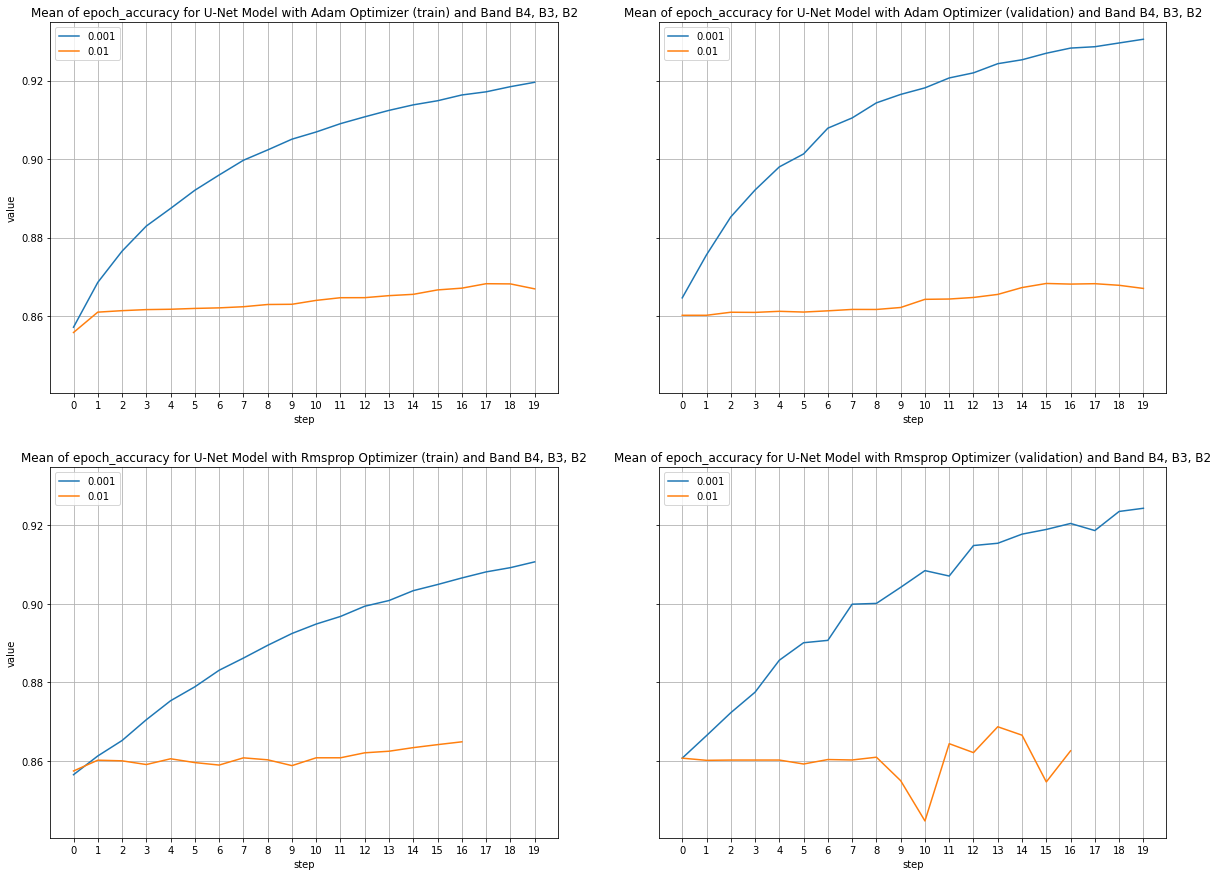

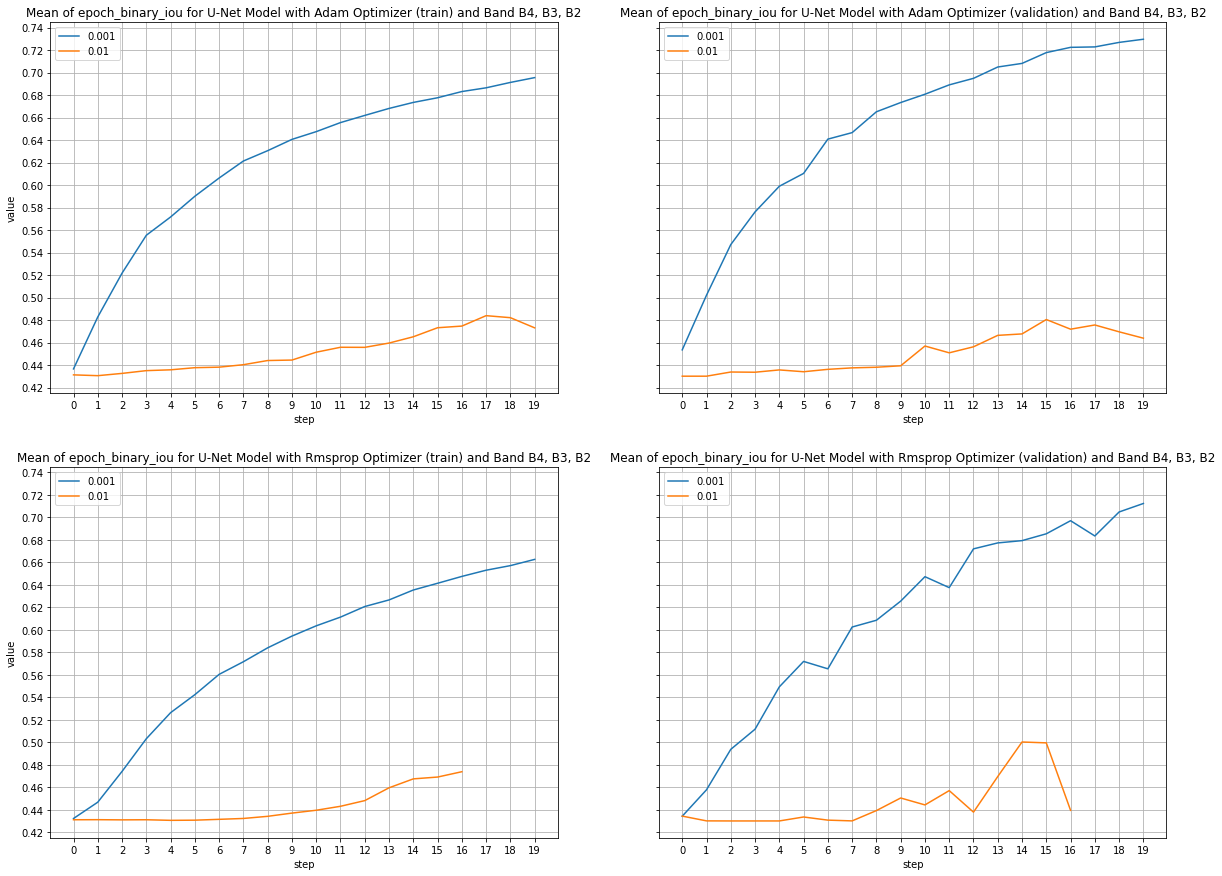

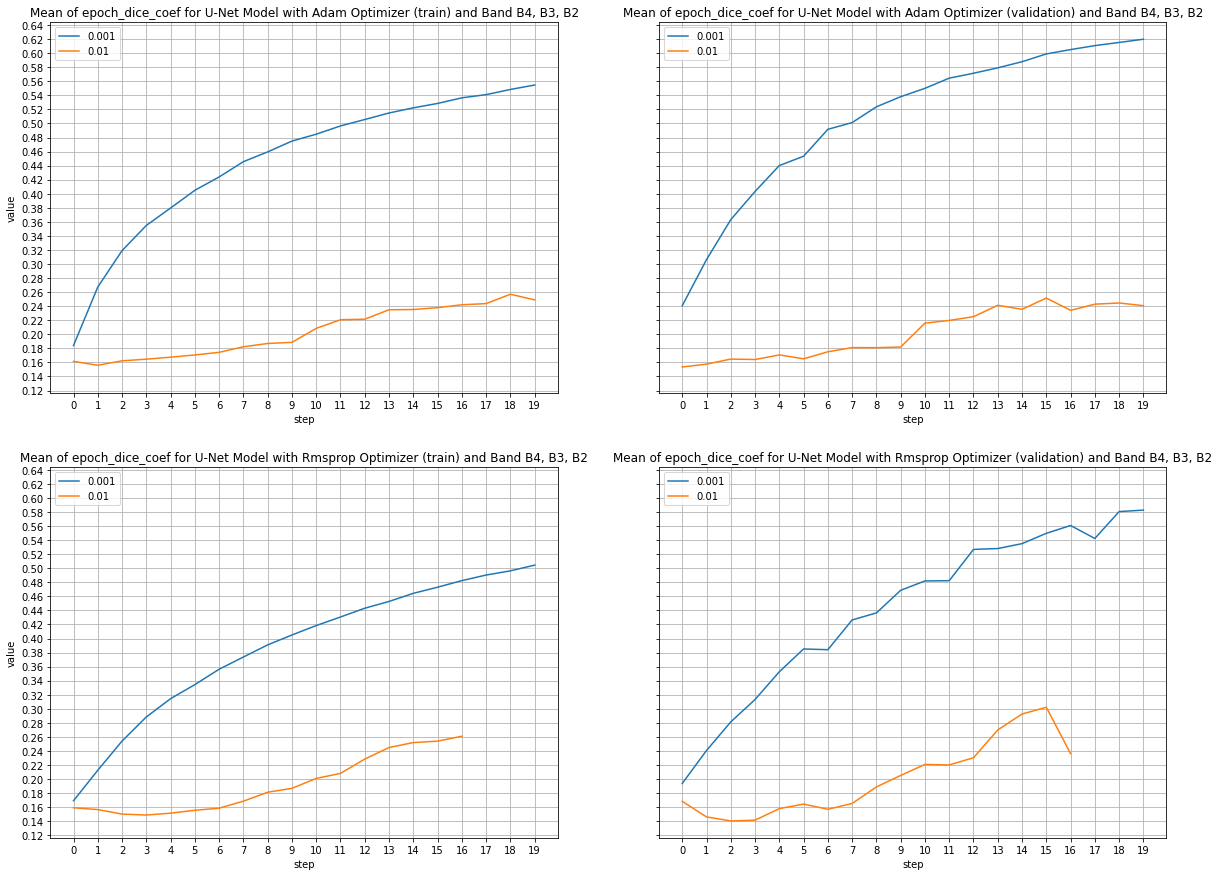

In [21]:
metrics = {'epoch_accuracy': 'Binary Accuracy', 
           'epoch_binary_iou': 'Binary IoU', 
           'epoch_dice_coef': 'Dice Coefficient'}

# Landsat
for key, metric in metrics.items():
    plot_metric_for_optimizer(key, 'B4, B3, B2', 'lr', df_landsat_b4_b3_b2)
    
for key, metric in metrics.items():
    plot_metric_for_optimizer(key, 'B7, B5, B2', 'lr', df_landsat_b7_b5_b2)
    
# Sentinel
for key, metric in metrics.items():
    plot_metric_for_optimizer(key, 'B4, B3, B2', 'lr', df_sentinel_b4_b3_b2)
    
for key, metric in metrics.items():
    plot_metric_for_optimizer(key, 'B12, B8, B2', 'lr', df_sentinel_b12_b8_b2)

## Plot Loss

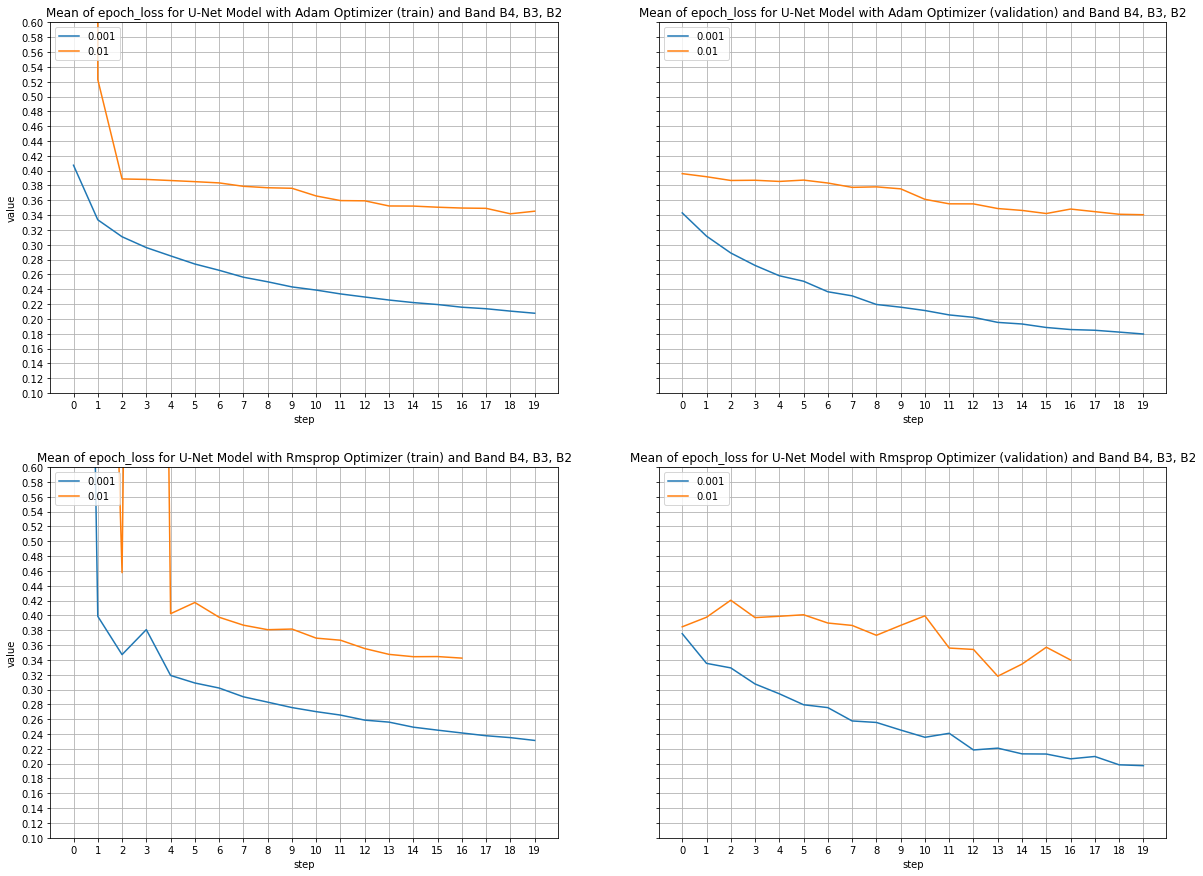

In [14]:
metrics = {'epoch_loss': 'Binary Cross-Entropy'}

# Landsat
for key, metric in metrics.items():
    plot_loss(key, 'B4, B3, B2', 'lr', df_landsat_b4_b3_b2)
    
for key, metric in metrics.items():
    plot_loss(key, 'B7, B5, B2', 'lr', df_landsat_b7_b5_b2) 

# Sentinel    
for key, metric in metrics.items():
    plot_loss(key, 'B4, B3, B2', 'lr', df_sentinel_b4_b3_b2)    
    
for key, metric in metrics.items():
    plot_loss(key, 'B12, B8, B2', 'lr', df_sentinel_b12_b8_b2)

# Batch Size


In [13]:
def plot_metric_for_batch(metric, metric_name,band_title, hue, data_for_plot):
    data_train= data_for_plot.loc[
        (data_for_plot.run.str.endswith('train')) & 
        (data_for_plot.tag==metric)]
    
    data_val= data_for_plot.loc[
        (data_for_plot.run.str.endswith('validation')) & 
        (data_for_plot.tag==metric)]
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)
    
    ax[0].grid()
    ax[0].set_xticks(np.arange(data_train.step.min(), data_train.step.max()+1, 1))
    ax[0].set_yticks(np.arange(math.floor(data_train.value.min()), math.floor(data_train.value.max()+1), 0.02))
    sns.lineplot(data=data_train, x='step', y='value', hue=hue, ax=ax[0], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model Using All Batch Size (train) and Band {}'.format(metric_name, band_title))
    ax[0].legend(loc='upper left')
    
    ax[1].grid()
    ax[1].set_xticks(np.arange(data_val.step.min(), data_val.step.max()+1, 1))
    ax[1].set_yticks(np.arange(math.floor(data_val.value.min()), math.floor(data_val.value.max()+1), 0.02))
    sns.lineplot(data=data_val, x='step', y='value', hue=hue, ax=ax[1], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model Using All Batch Size (validation) and Band {}'.format(metric_name, band_title))
    ax[1].legend(loc='upper left')
    plt.show()

In [14]:
def plot_loss_for_batch(metric, metric_name, band_title, hue, data_for_plot):
    data_train= data_for_plot.loc[
        (data_for_plot.run.str.endswith('train')) & 
        (data_for_plot.tag==metric)]
    
    data_val= data_for_plot.loc[
        (data_for_plot.run.str.endswith('validation')) & 
        (data_for_plot.tag==metric)]
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)
    
    ax[0].grid()
    ax[0].set_xticks(np.arange(data_train.step.min(), data_train.step.max()+1, 1))
    ax[0].set_yticks(np.arange(math.floor(data_train.value.min()), 1, 0.02))
    ax[0].set_ylim([0.1, 0.6])
    sns.lineplot(data=data_train, x='step', y='value', hue=hue, ax=ax[0], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model Using All Batch Size (train) and Band {}'.format(metric_name, band_title))
    ax[0].legend(loc='upper left')
    
    ax[1].grid()
    ax[1].set_xticks(np.arange(data_val.step.min(), data_val.step.max()+1, 1))
    ax[1].set_yticks(np.arange(math.floor(data_val.value.min()), 1, 0.02))
    ax[1].set_ylim([0.1, 0.6])
    sns.lineplot(data=data_val, x='step', y='value', hue=hue, ax=ax[1], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model Using All Batch Size (validation) and Band {}'.format(metric_name, band_title))
    ax[1].legend(loc='upper left')
    plt.show()

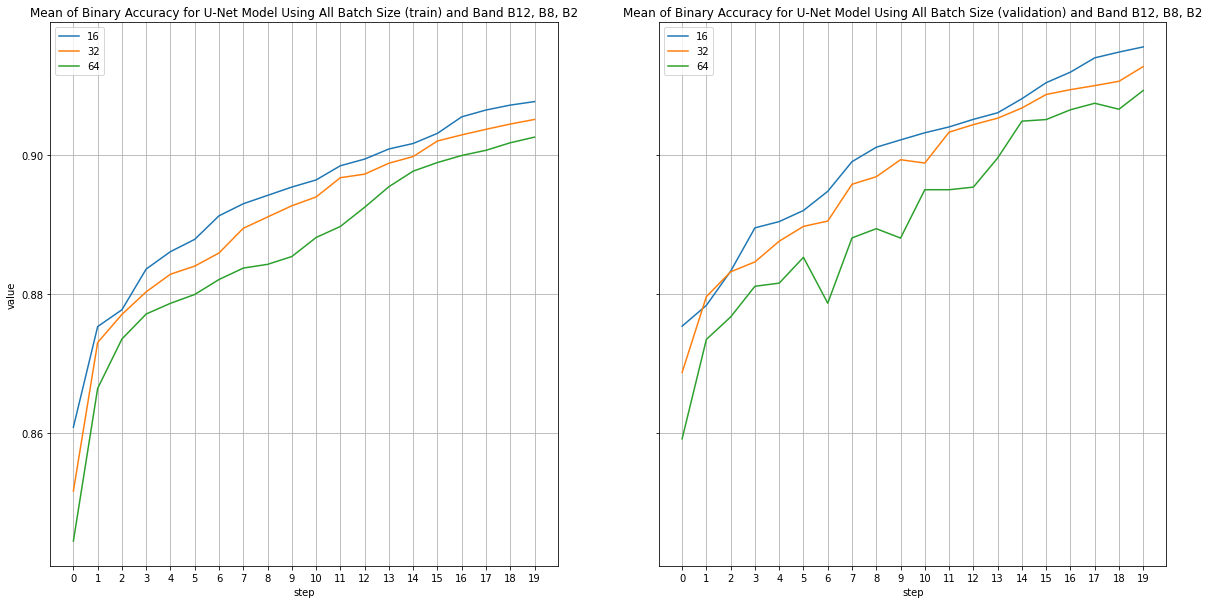

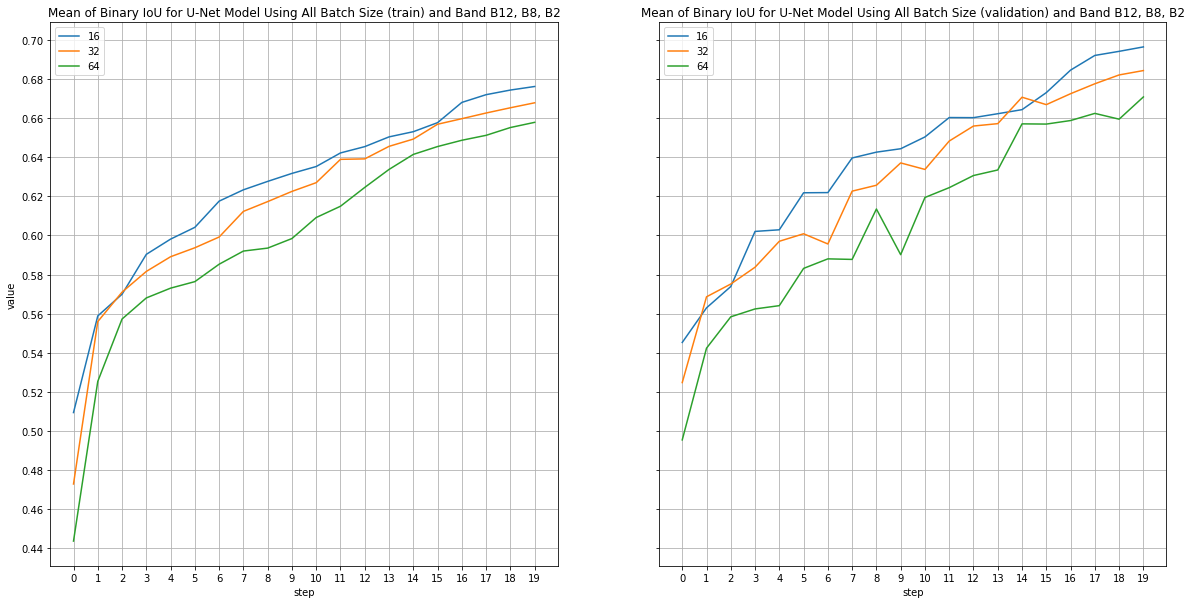

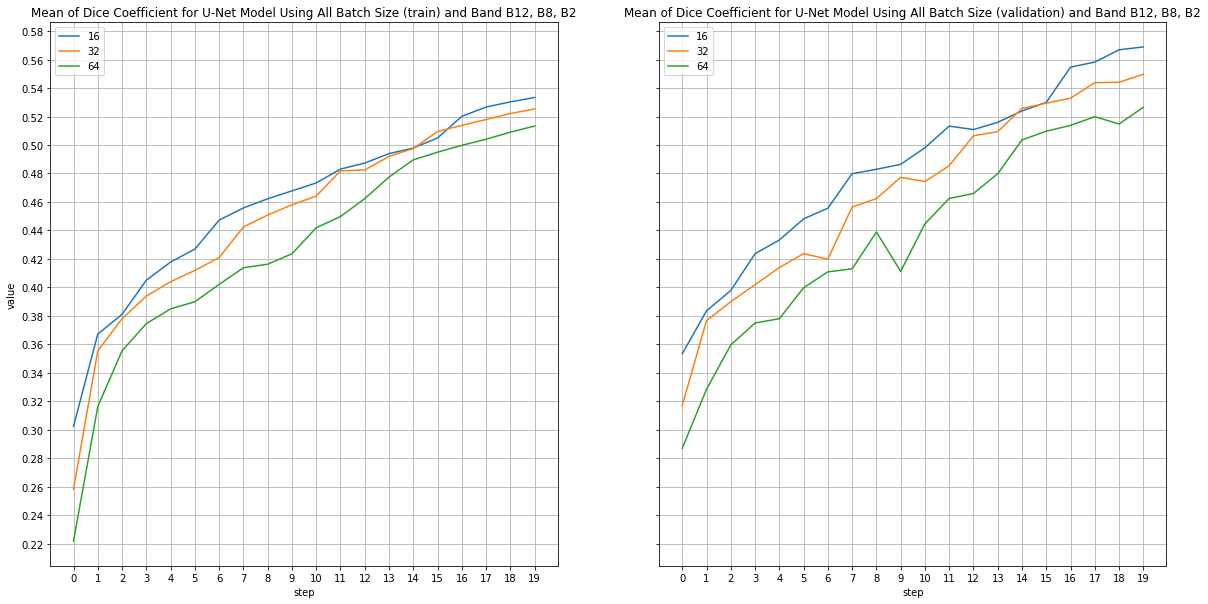

In [15]:
metrics = {'epoch_accuracy': 'Binary Accuracy', 
           'epoch_binary_iou': 'Binary IoU', 
           'epoch_dice_coef': 'Dice Coefficient'}

hue='batch'
# Landsat
for key, metric in metrics.items():
    plot_metric_for_batch(key, metric, 'B4, B3, B2', hue, df_landsat_b4_b3_b2)
    
for key, metric in metrics.items():
    plot_metric_for_batch(key, metric, 'B7, B5, B2', hue, df_landsat_b7_b5_b2)
    
# Sentinel
for key, metric in metrics.items():
    plot_metric_for_batch(key, metric, 'B4, B3, B2', hue, df_sentinel_b4_b3_b2)
    
for key, metric in metrics.items():
    plot_metric_for_batch(key, metric, 'B12, B8, B2', hue, df_sentinel_b12_b8_b2)

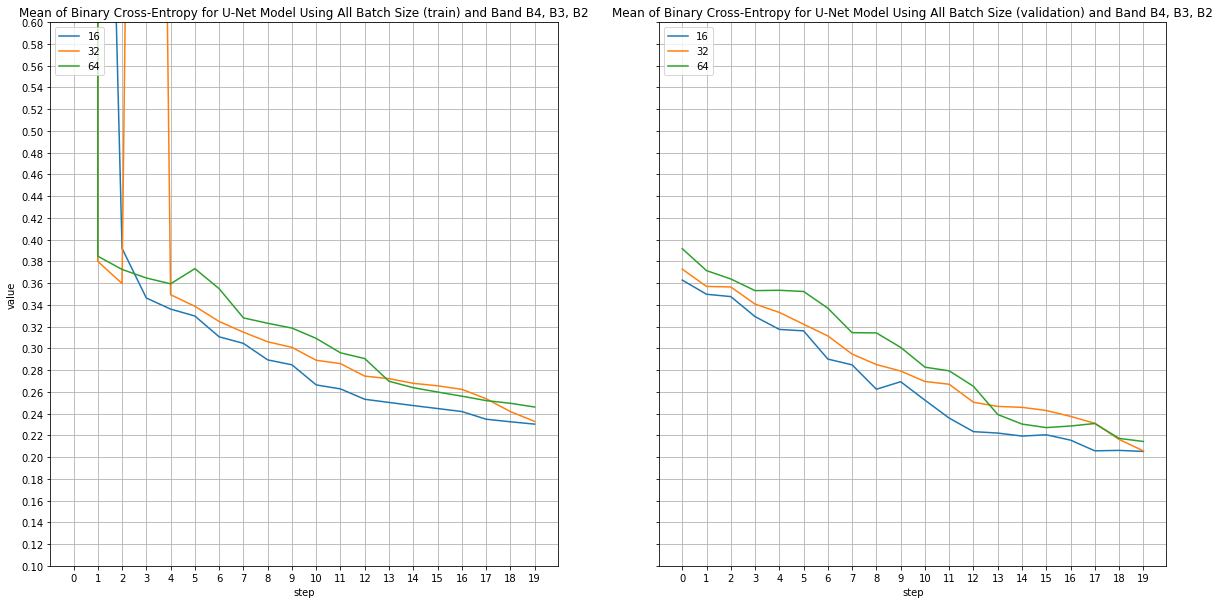

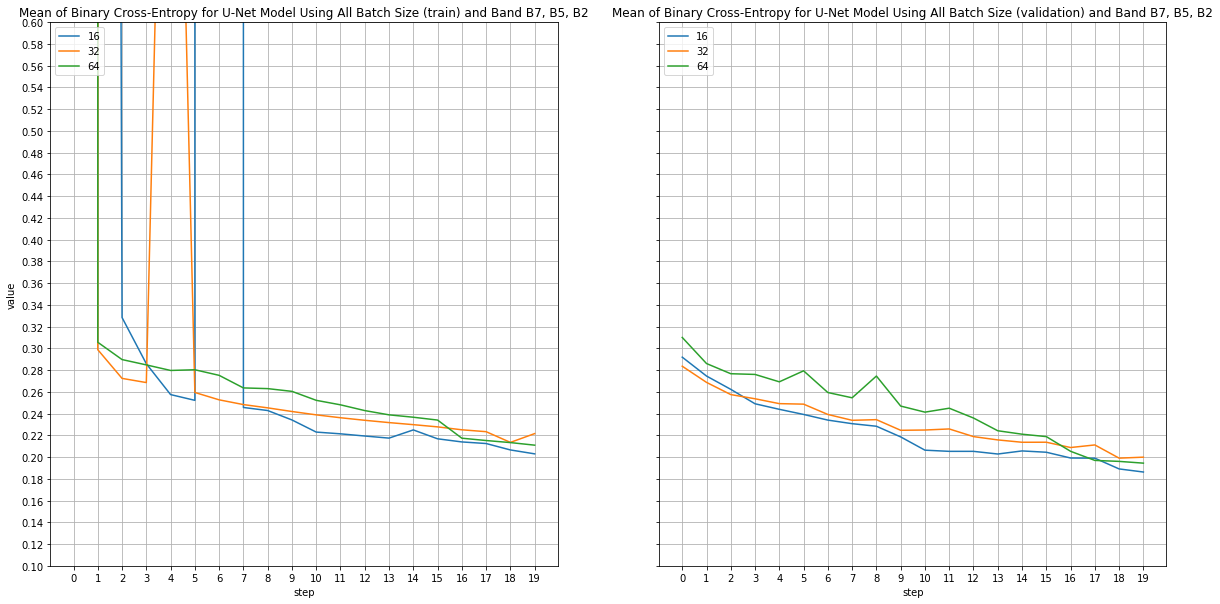

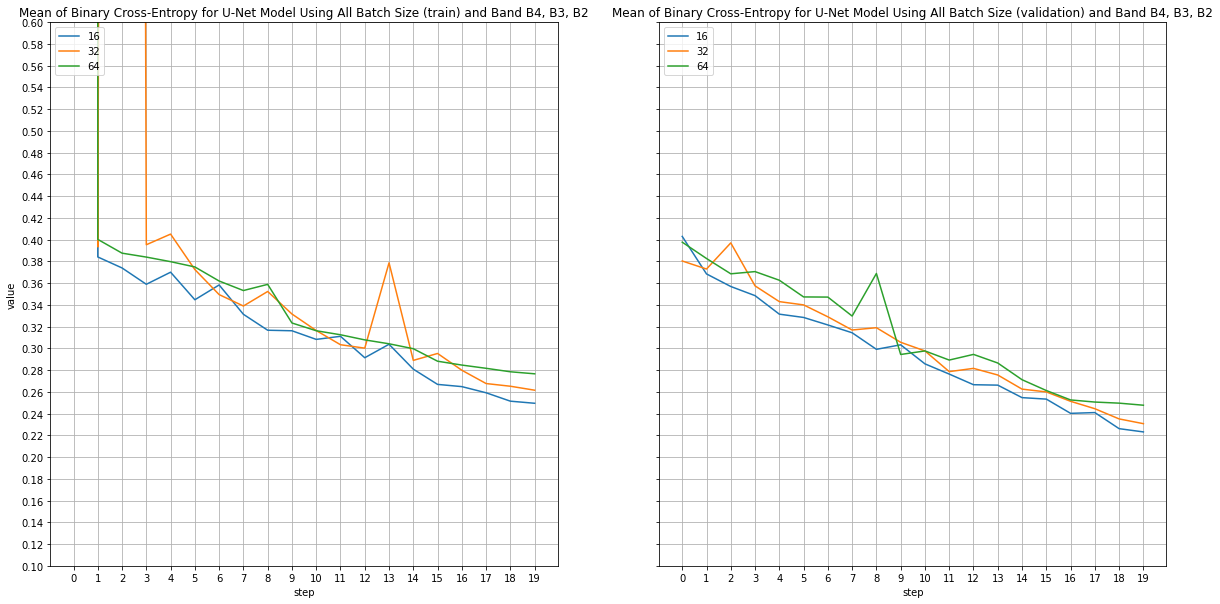

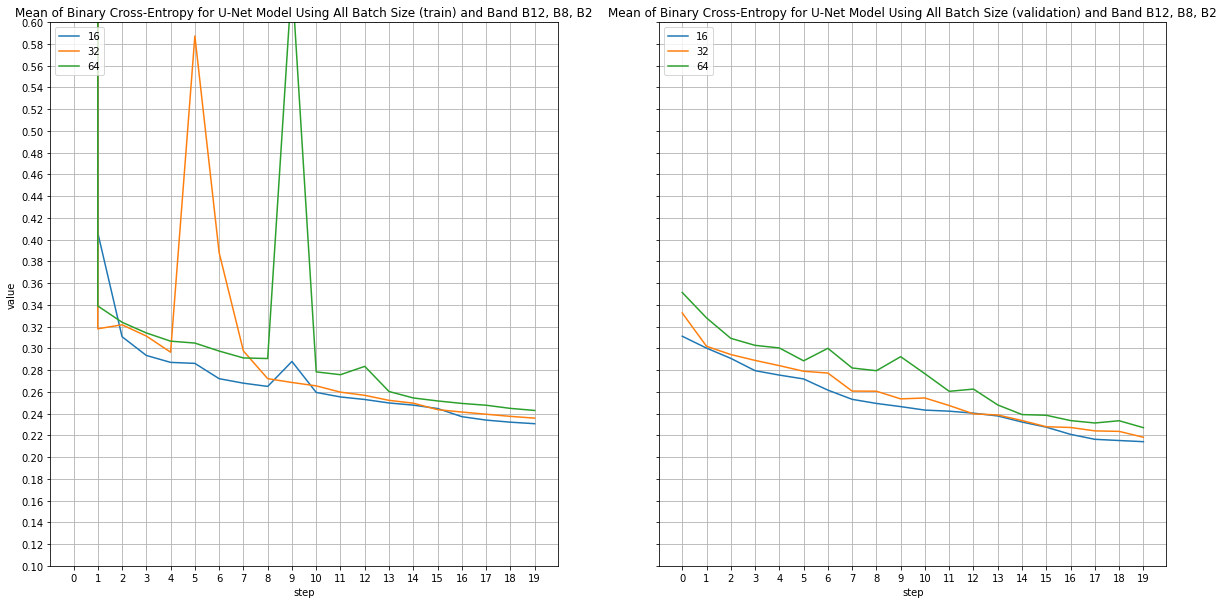

In [70]:
metrics = {'epoch_loss': 'Binary Cross-Entropy'}

hue='batch'
# Landsat
for key, metric in metrics.items():
    plot_loss_for_batch(key, metric, 'B4, B3, B2', hue, df_landsat_b4_b3_b2)
    
for key, metric in metrics.items():
    plot_loss_for_batch(key, metric, 'B7, B5, B2', hue, df_landsat_b7_b5_b2) 

# Sentinel    
for key, metric in metrics.items():
    plot_loss_for_batch(key, metric, 'B4, B3, B2', hue, df_sentinel_b4_b3_b2)    
    
for key, metric in metrics.items():
    plot_loss_for_batch(key, metric,'B12, B8, B2', hue, df_sentinel_b12_b8_b2)

# Start Filter

In [25]:
def plot_metric_for_start_filter(metric, metric_name,band_title, hue, data_for_plot):
    data_train= data_for_plot.loc[
        (data_for_plot.run.str.endswith('train')) & 
        (data_for_plot.tag==metric)]
    
    data_val= data_for_plot.loc[
        (data_for_plot.run.str.endswith('validation')) & 
        (data_for_plot.tag==metric)]
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)
    
    ax[0].grid()
    ax[0].set_xticks(np.arange(data_train.step.min(), data_train.step.max()+1, 1))
    ax[0].set_yticks(np.arange(math.floor(data_train.value.min()), math.floor(data_train.value.max()+1), 0.02))
    sns.lineplot(data=data_train, x='step', y='value', hue=hue, ax=ax[0], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model Using All Starting Filter (train) and Band {}'.format(metric_name, band_title))
    ax[0].legend(loc='upper left')
    
    ax[1].grid()
    ax[1].set_xticks(np.arange(data_val.step.min(), data_val.step.max()+1, 1))
    ax[1].set_yticks(np.arange(math.floor(data_val.value.min()), math.floor(data_val.value.max()+1), 0.02))
    sns.lineplot(data=data_val, x='step', y='value', hue=hue, ax=ax[1], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model Using All Starting Filter (validation) and Band {}'.format(metric_name, band_title))
    ax[1].legend(loc='upper left')
    plt.show()

In [43]:
def plot_loss_for_start_filter(metric, metric_name, band_title, hue, data_for_plot):
    data_train= data_for_plot.loc[
        (data_for_plot.run.str.endswith('train')) & 
        (data_for_plot.tag==metric)]
    
    data_val= data_for_plot.loc[
        (data_for_plot.run.str.endswith('validation')) & 
        (data_for_plot.tag==metric)]
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 10), sharey=True)
    
    ax[0].grid()
    ax[0].set_xticks(np.arange(data_train.step.min(), data_train.step.max()+1, 1))
    ax[0].set_yticks(np.arange(math.floor(data_train.value.min()), 1, 0.02))
    ax[0].set_ylim([0.1, 0.6])
    sns.lineplot(data=data_train, x='step', y='value', hue=hue, ax=ax[0], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model Using All Starting Filter (train) and Band {}'.format(metric_name, band_title))
    ax[0].legend(loc='upper left')
    
    ax[1].grid()
    ax[1].set_xticks(np.arange(data_val.step.min(), data_val.step.max()+1, 1))
    ax[1].set_yticks(np.arange(math.floor(data_val.value.min()), 1, 0.02))
    ax[1].set_ylim([0.1, 0.6])
    sns.lineplot(data=data_val, x='step', y='value', hue=hue, ax=ax[1], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model Using All Starting Filtere (validation) and Band {}'.format(metric_name, band_title))
    ax[1].legend(loc='upper left')
    plt.show()

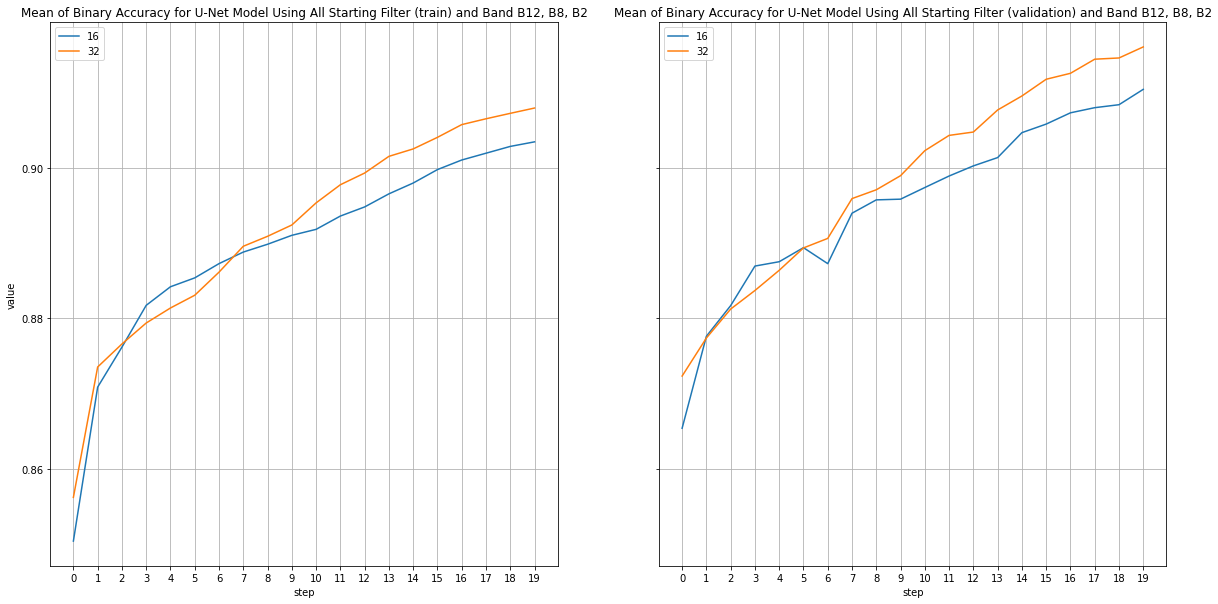

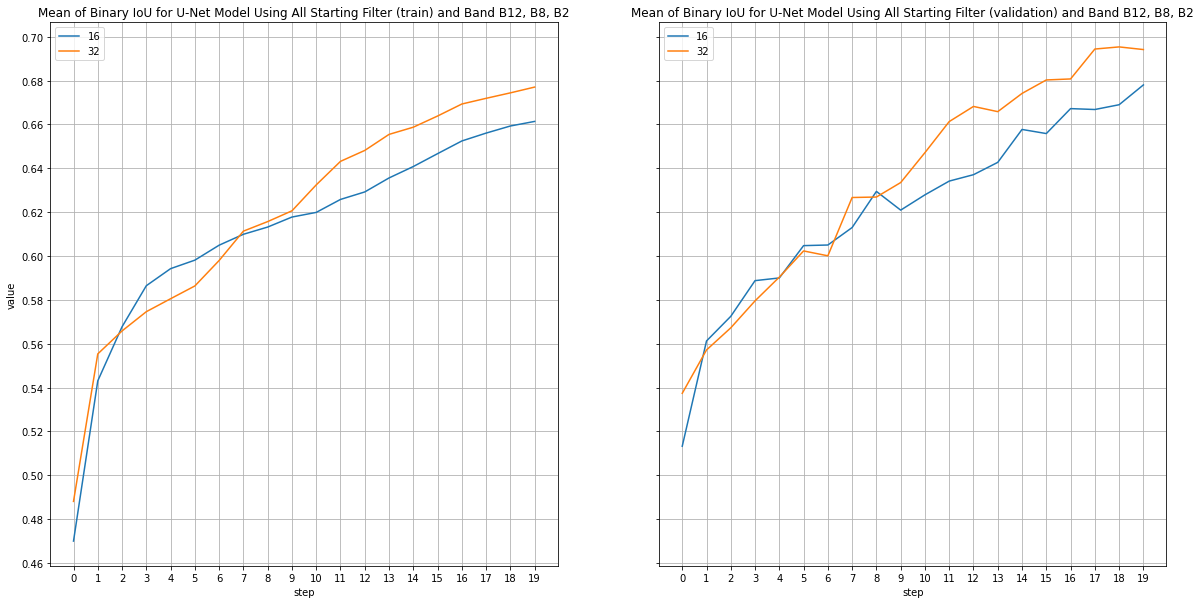

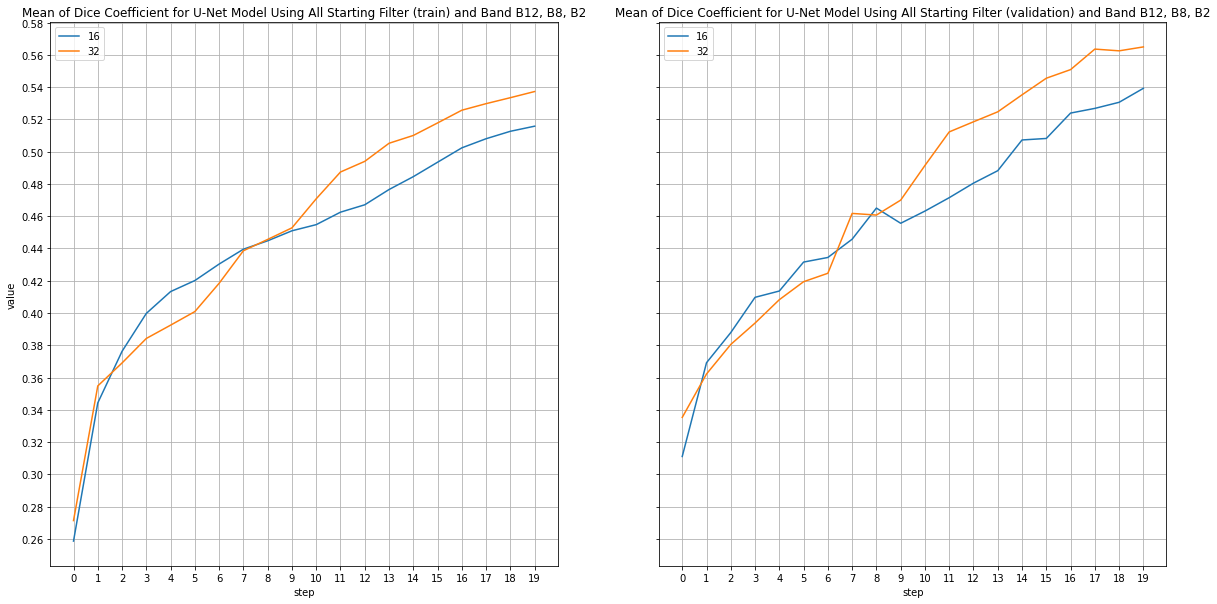

In [40]:
metrics = {'epoch_accuracy': 'Binary Accuracy', 
           'epoch_binary_iou': 'Binary IoU', 
           'epoch_dice_coef': 'Dice Coefficient'}

hue='start_filter'
# Landsat
for key, metric in metrics.items():
    plot_metric_for_start_filter(key, metric, 'B4, B3, B2', hue, df_landsat_b4_b3_b2)
    
for key, metric in metrics.items():
    plot_metric_for_start_filter(key, metric, 'B7, B5, B2', hue, df_landsat_b7_b5_b2)
    
# Sentinel
for key, metric in metrics.items():
    plot_metric_for_start_filter(key, metric, 'B4, B3, B2', hue, df_sentinel_b4_b3_b2)
    
for key, metric in metrics.items():
    plot_metric_for_start_filter(key, metric, 'B12, B8, B2', hue, df_sentinel_b12_b8_b2)

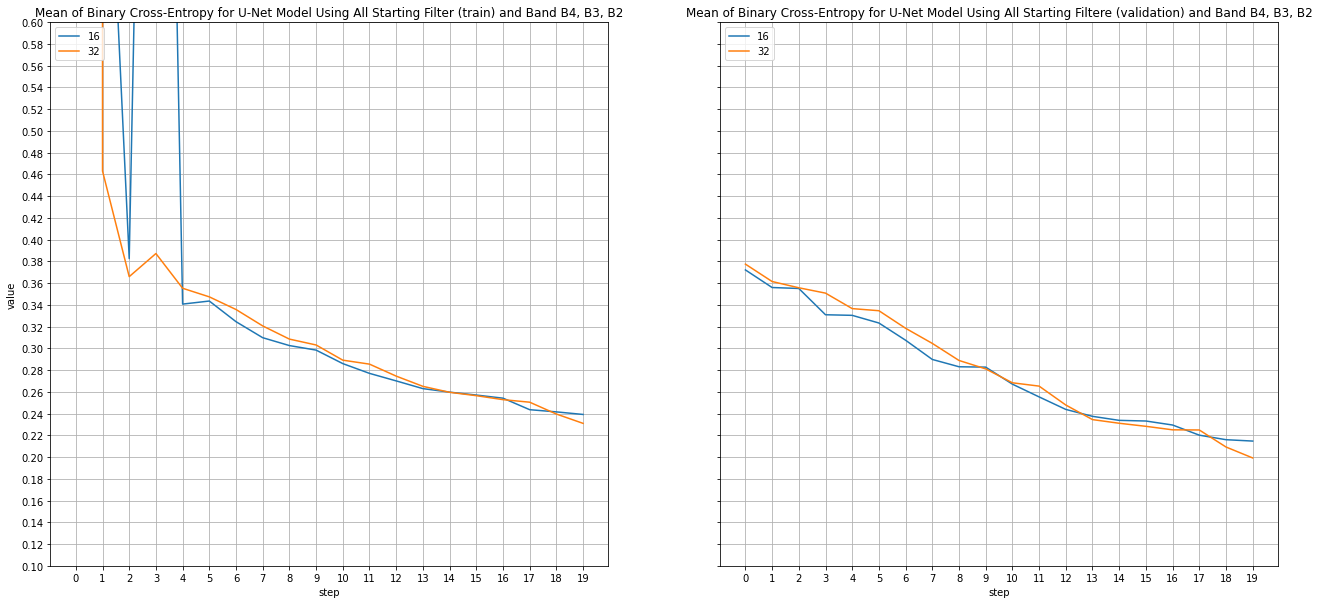

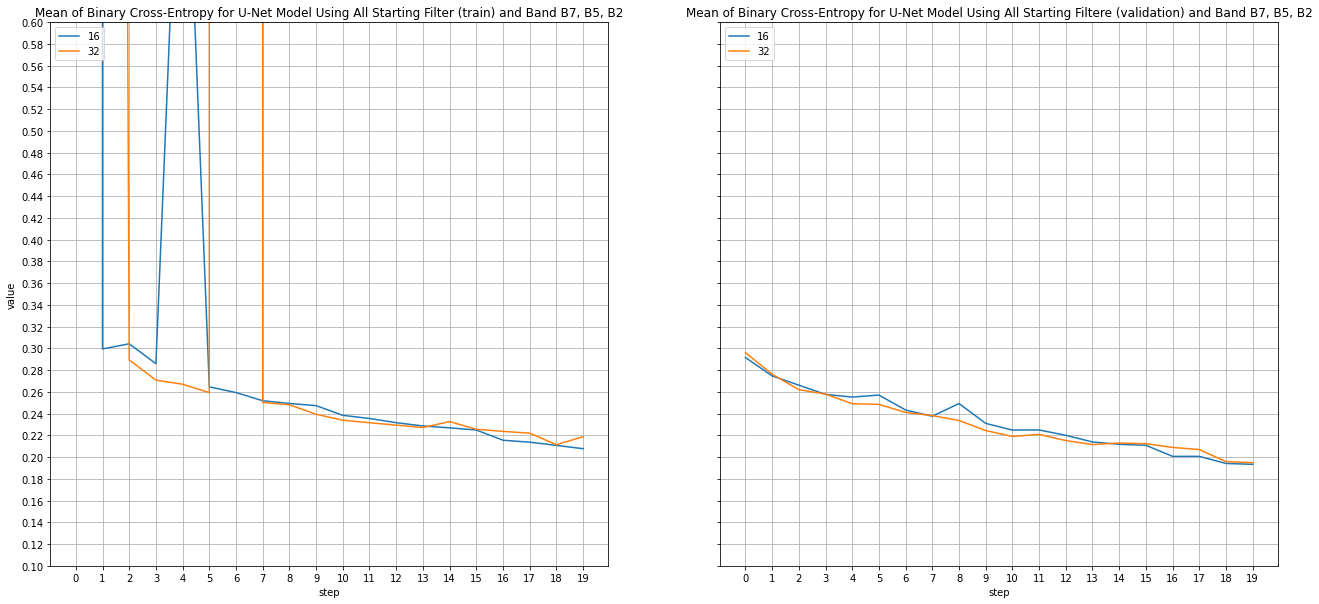

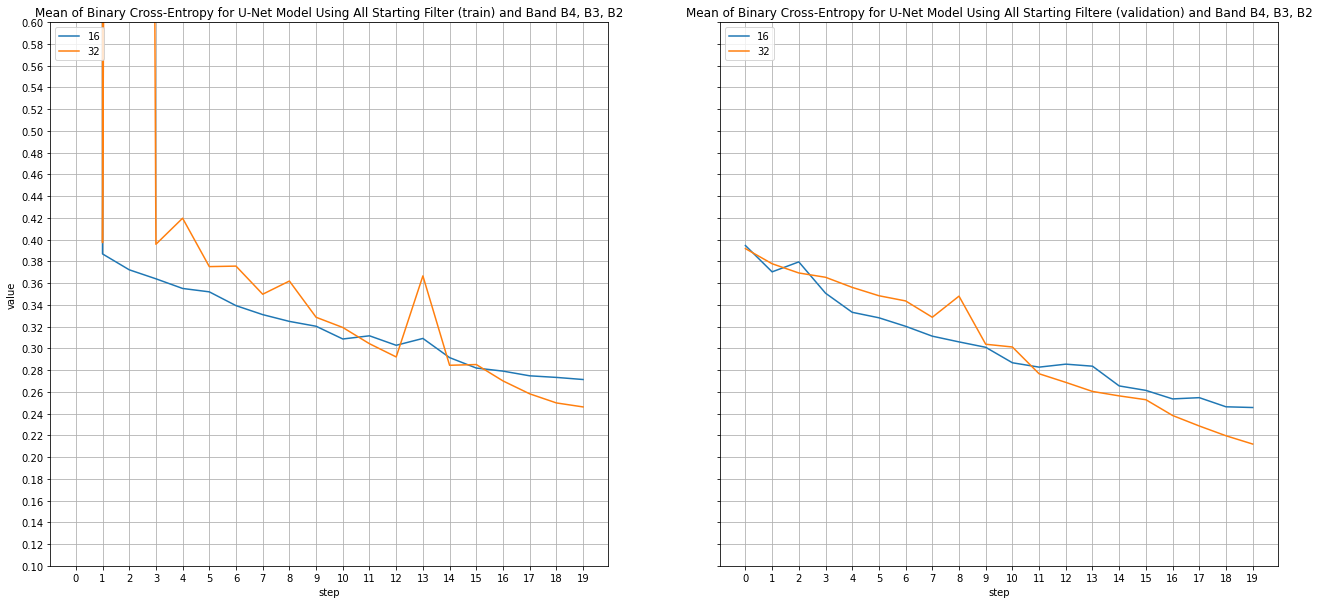

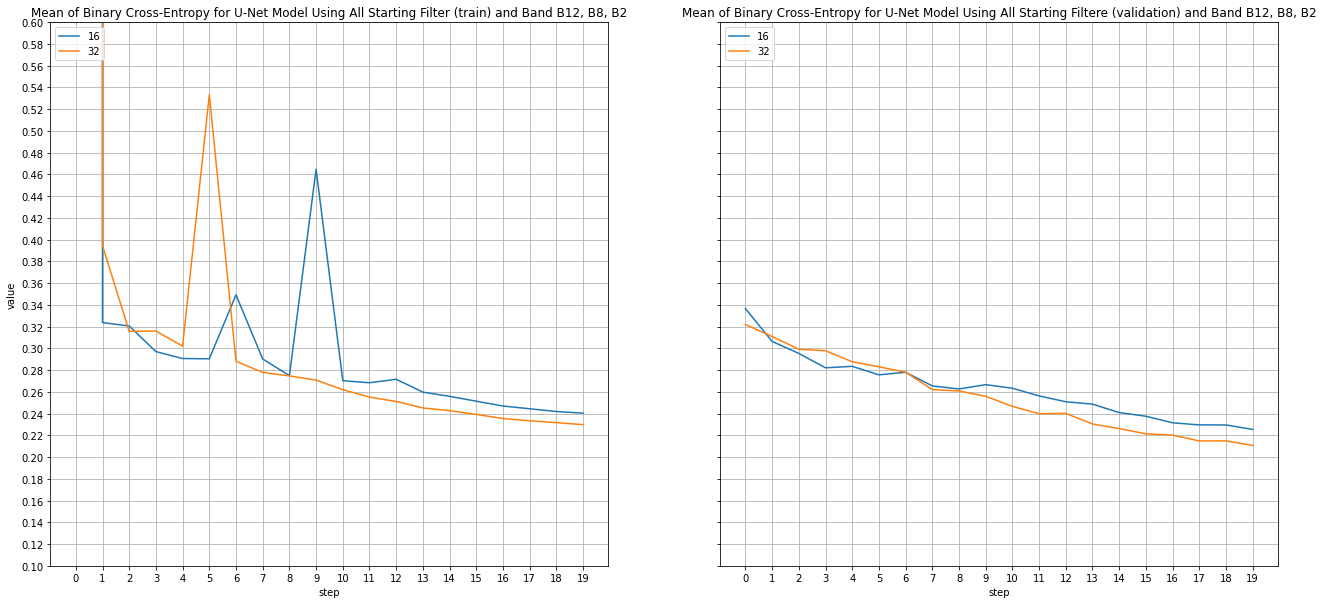

In [44]:
metrics = {'epoch_loss': 'Binary Cross-Entropy'}

hue='start_filter'
# Landsat
for key, metric in metrics.items():
    plot_loss_for_start_filter(key, metric, 'B4, B3, B2', hue, df_landsat_b4_b3_b2)
    
for key, metric in metrics.items():
    plot_loss_for_start_filter(key, metric, 'B7, B5, B2', hue, df_landsat_b7_b5_b2) 

# Sentinel    
for key, metric in metrics.items():
    plot_loss_for_start_filter(key, metric, 'B4, B3, B2', hue, df_sentinel_b4_b3_b2)    
    
for key, metric in metrics.items():
    plot_loss_for_start_filter(key, metric,'B12, B8, B2', hue, df_sentinel_b12_b8_b2)

# Image Size

In [46]:
def plot_metric_for_image_size(metric, metric_name,band_title, hue, data_for_plot):
    data_train= data_for_plot.loc[
        (data_for_plot.run.str.endswith('train')) & 
        (data_for_plot.tag==metric)]
    
    data_val= data_for_plot.loc[
        (data_for_plot.run.str.endswith('validation')) & 
        (data_for_plot.tag==metric)]
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)
    
    ax[0].grid()
    ax[0].set_xticks(np.arange(data_train.step.min(), data_train.step.max()+1, 1))
    ax[0].set_yticks(np.arange(math.floor(data_train.value.min()), math.floor(data_train.value.max()+1), 0.02))
    sns.lineplot(data=data_train, x='step', y='value', hue=hue, ax=ax[0], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model Using All Image Size (train) and Band {}'.format(metric_name, band_title))
    ax[0].legend(loc='upper left')
    
    ax[1].grid()
    ax[1].set_xticks(np.arange(data_val.step.min(), data_val.step.max()+1, 1))
    ax[1].set_yticks(np.arange(math.floor(data_val.value.min()), math.floor(data_val.value.max()+1), 0.02))
    sns.lineplot(data=data_val, x='step', y='value', hue=hue, ax=ax[1], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model Using All Image Size (validation) and Band {}'.format(metric_name, band_title))
    ax[1].legend(loc='upper left')
    plt.show()


In [47]:
def plot_loss_for_image_size(metric, metric_name, band_title, hue, data_for_plot):
    data_train= data_for_plot.loc[
        (data_for_plot.run.str.endswith('train')) & 
        (data_for_plot.tag==metric)]
    
    data_val= data_for_plot.loc[
        (data_for_plot.run.str.endswith('validation')) & 
        (data_for_plot.tag==metric)]
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)
    
    ax[0].grid()
    ax[0].set_xticks(np.arange(data_train.step.min(), data_train.step.max()+1, 1))
    ax[0].set_yticks(np.arange(math.floor(data_train.value.min()), 1, 0.02))
    ax[0].set_ylim([0.1, 0.6])
    sns.lineplot(data=data_train, x='step', y='value', hue=hue, ax=ax[0], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model Using All Image Size  (train) and Band {}'.format(metric_name, band_title))
    ax[0].legend(loc='upper left')
    
    ax[1].grid()
    ax[1].set_xticks(np.arange(data_val.step.min(), data_val.step.max()+1, 1))
    ax[1].set_yticks(np.arange(math.floor(data_val.value.min()), 1, 0.02))
    ax[1].set_ylim([0.1, 0.6])
    sns.lineplot(data=data_val, x='step', y='value', hue=hue, ax=ax[1], palette='tab10', ci=None)\
        .set_title('Mean of {} for U-Net Model Using All Image Size (validation) and Band {}'.format(metric_name, band_title))
    ax[1].legend(loc='upper left')
    plt.show()

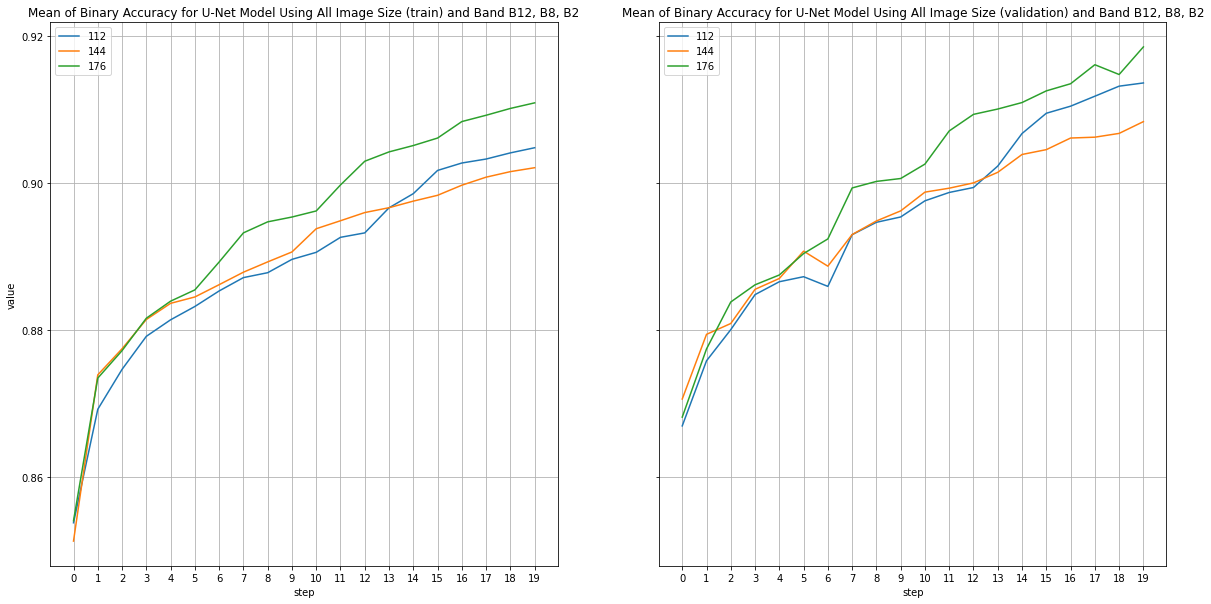

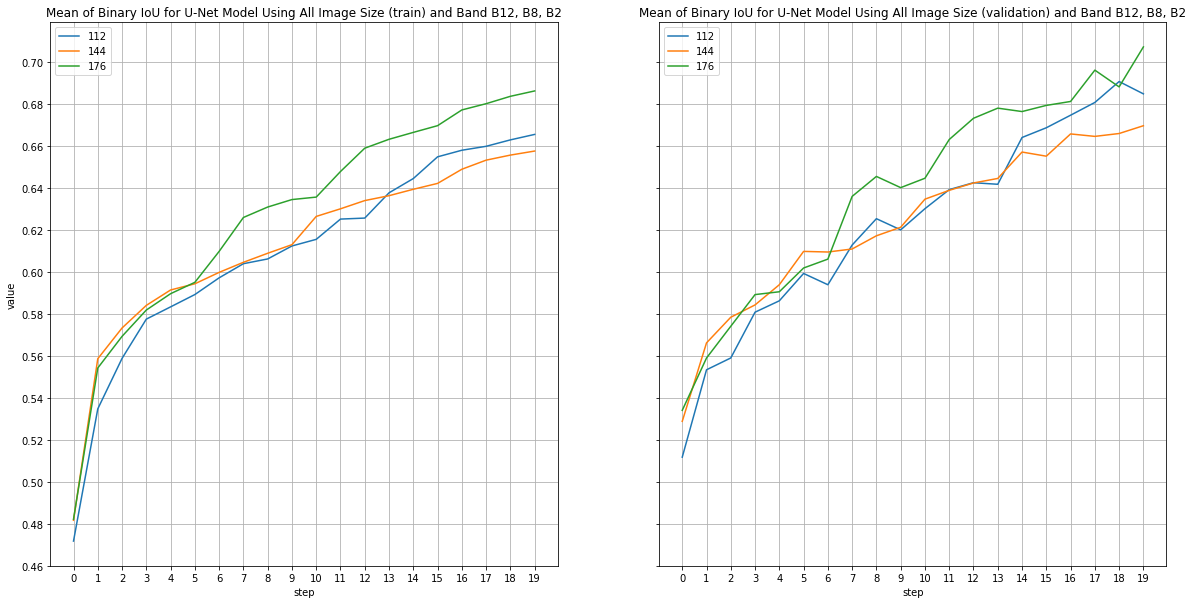

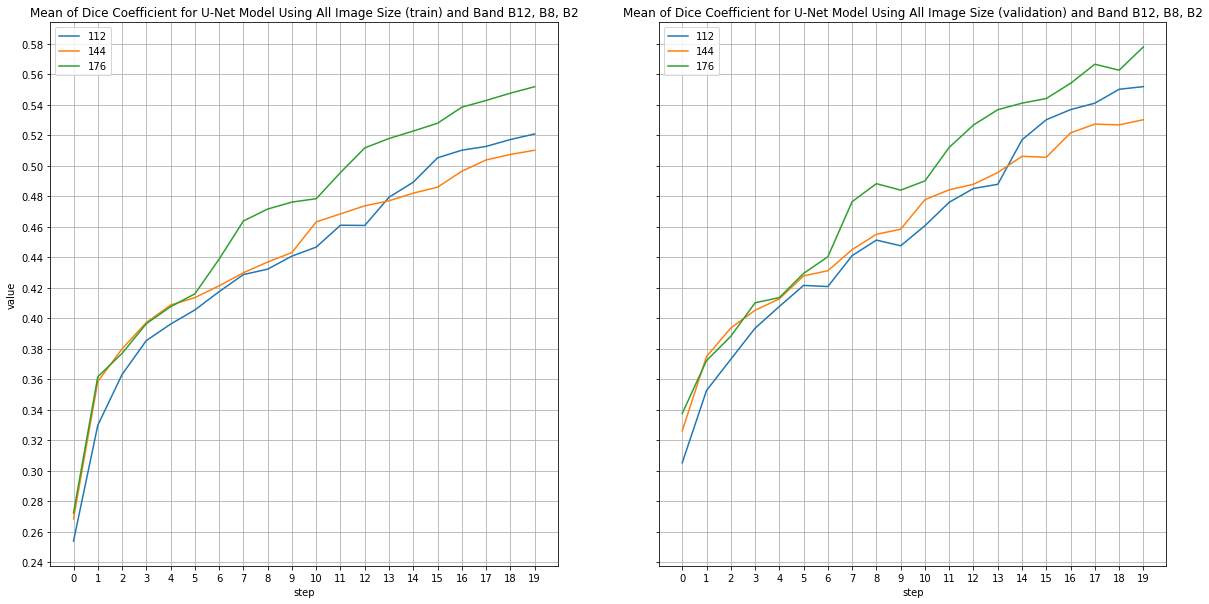

In [59]:
metrics = {'epoch_accuracy': 'Binary Accuracy', 
           'epoch_binary_iou': 'Binary IoU', 
           'epoch_dice_coef': 'Dice Coefficient'}

hue='img_size'
# Landsat
for key, metric in metrics.items():
     plot_metric_for_image_size(key, metric, 'B4, B3, B2', hue, df_landsat_b4_b3_b2)
    
for key, metric in metrics.items():
     plot_metric_for_image_size(key, metric, 'B7, B5, B2', hue, df_landsat_b7_b5_b2)
    
# Sentinel
for key, metric in metrics.items():
     plot_metric_for_image_size(key, metric, 'B4, B3, B2', hue, df_sentinel_b4_b3_b2)
    
for key, metric in metrics.items():
    plot_metric_for_image_size(key, metric, 'B12, B8, B2', hue, df_sentinel_b12_b8_b2)

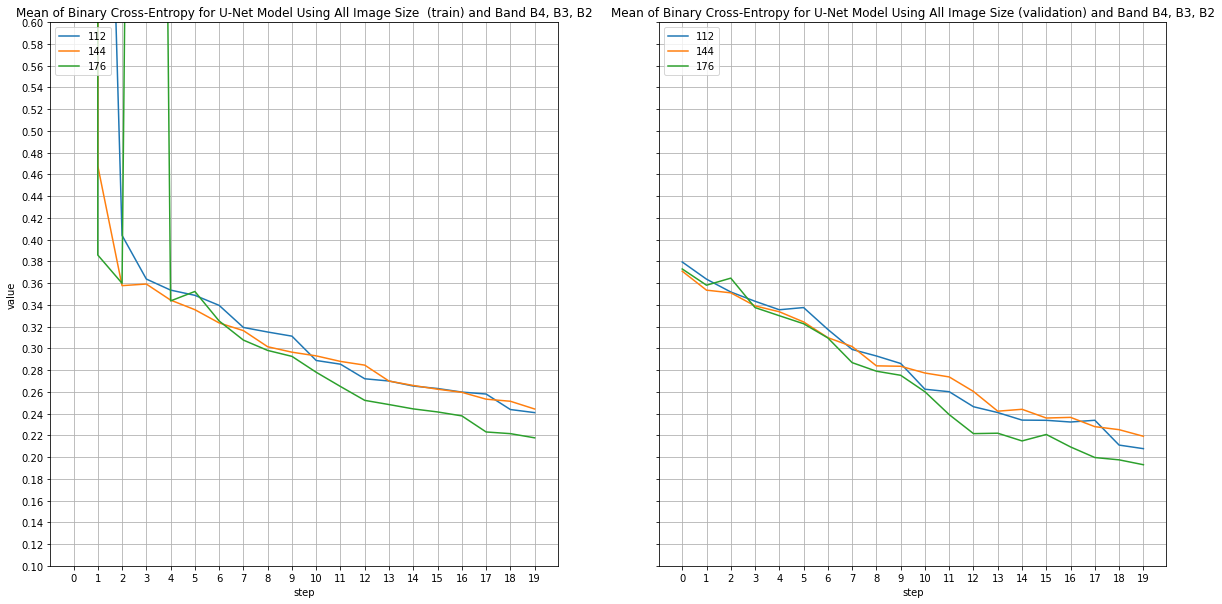

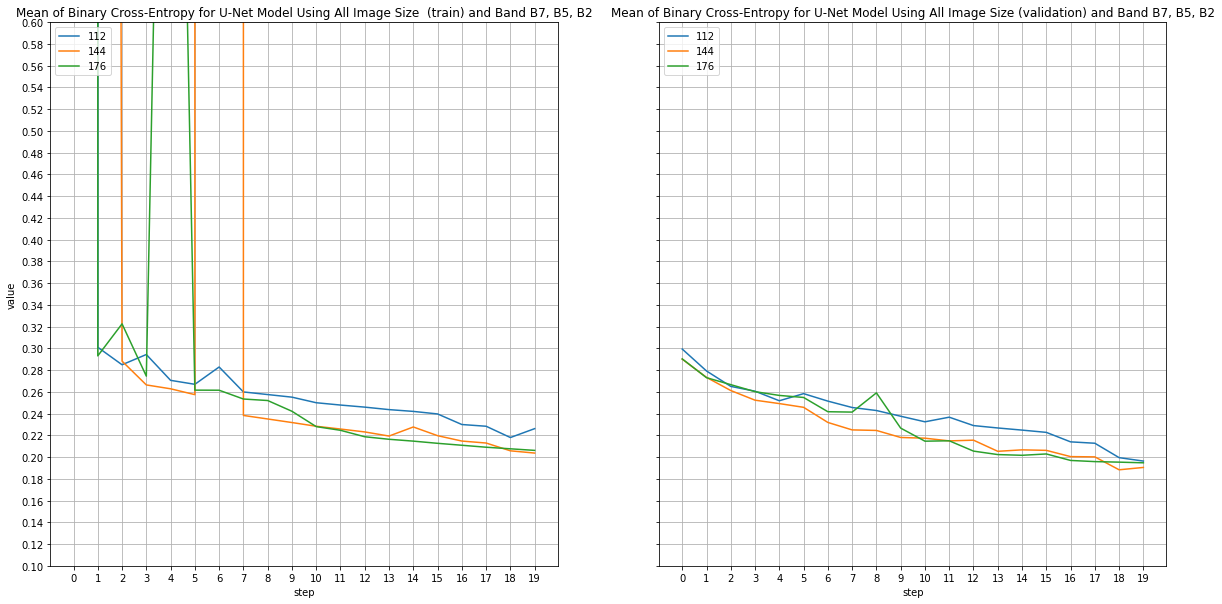

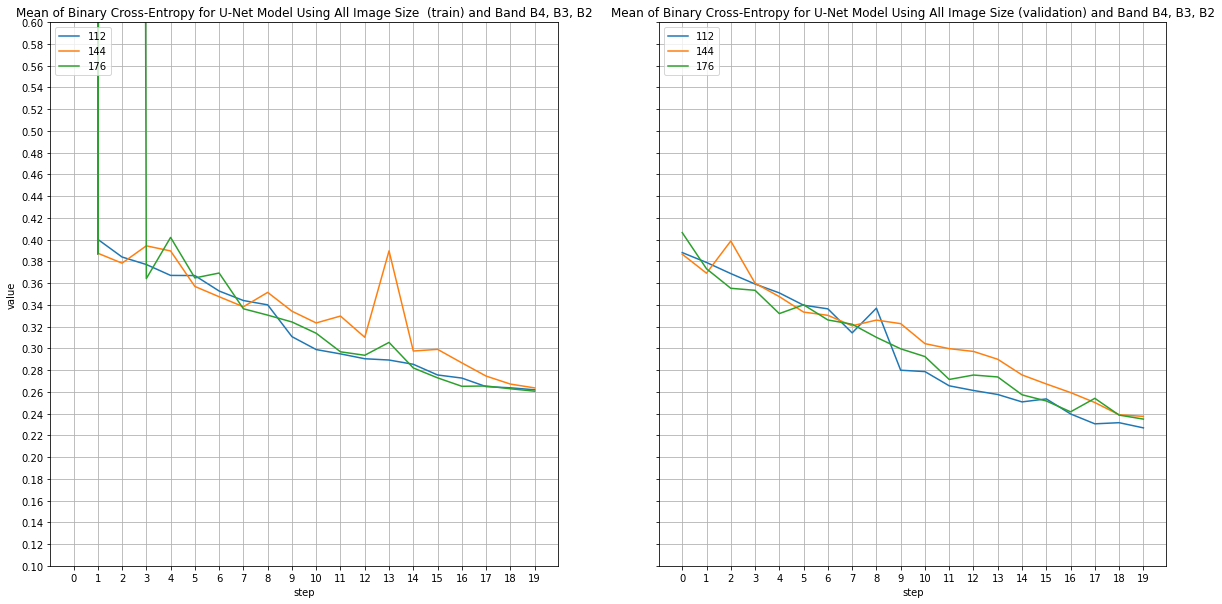

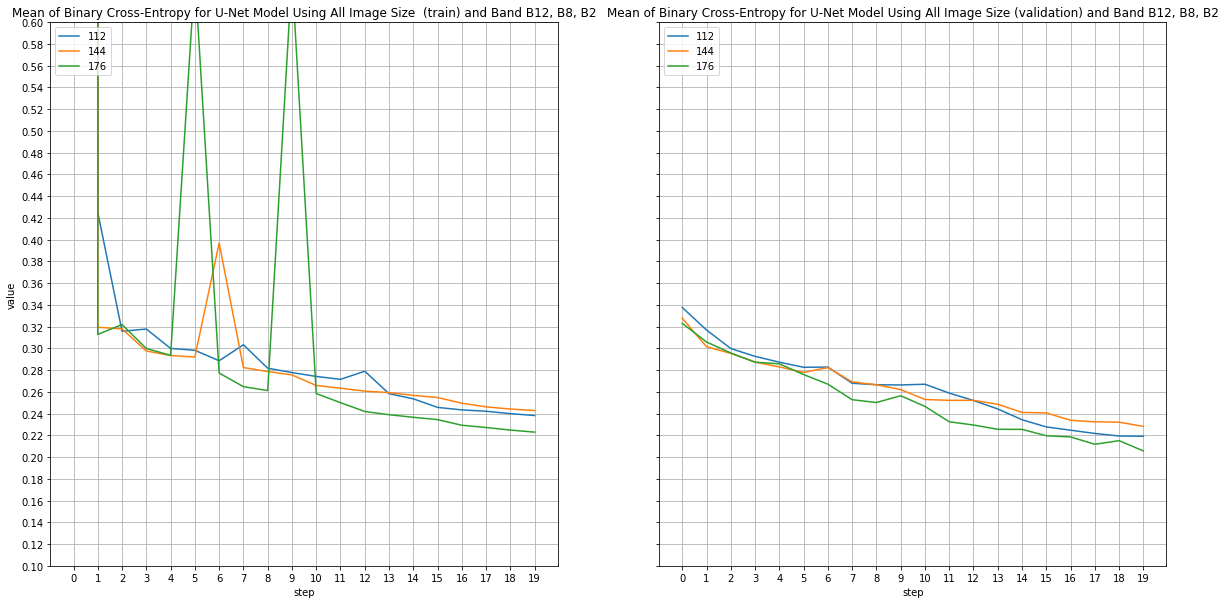

In [60]:
metrics = {'epoch_loss': 'Binary Cross-Entropy'}

hue='img_size'
# Landsat
for key, metric in metrics.items():
    plot_loss_for_image_size(key, metric, 'B4, B3, B2', hue, df_landsat_b4_b3_b2)
    
for key, metric in metrics.items():
    plot_loss_for_image_size(key, metric, 'B7, B5, B2', hue, df_landsat_b7_b5_b2) 

# Sentinel    
for key, metric in metrics.items():
    plot_loss_for_image_size(key, metric, 'B4, B3, B2', hue, df_sentinel_b4_b3_b2)    
    
for key, metric in metrics.items():
    plot_loss_for_image_size(key, metric,'B12, B8, B2', hue, df_sentinel_b12_b8_b2)

# Best Model

In [9]:
df_landsat_b4_b3_b2 = df.loc[df.satellite_band=='landsat_8_b4_b3_b2']
df_sentinel_b4_b3_b2 = df.loc[df.satellite_band=='sentinel_2_b4_b3_b2']
df_landsat_b7_b5_b2 = df.loc[df.satellite_band=='landsat_8_b7_b5_b2']
df_sentinel_b12_b8_b2 = df.loc[df.satellite_band=='sentinel_2_b12_b8_b2']

In [14]:
df_landsat_b4_b3_b2

,run,tag,step,value,satellite_band,type_run,opt,lr,batch,start_filter,img_size
0,fit\landsat_8_b4_b3_b2\unet_model_opt_adam_lr_...,epoch_accuracy,0,0.858952,landsat_8_b4_b3_b2,train,adam,0.001,16,16,112
1,fit\landsat_8_b4_b3_b2\unet_model_opt_adam_lr_...,epoch_accuracy,1,0.870404,landsat_8_b4_b3_b2,train,adam,0.001,16,16,112
2,fit\landsat_8_b4_b3_b2\unet_model_opt_adam_lr_...,epoch_accuracy,2,0.882472,landsat_8_b4_b3_b2,train,adam,0.001,16,16,112
3,fit\landsat_8_b4_b3_b2\unet_model_opt_adam_lr_...,epoch_accuracy,3,0.887319,landsat_8_b4_b3_b2,train,adam,0.001,16,16,112
4,fit\landsat_8_b4_b3_b2\unet_model_opt_adam_lr_...,epoch_accuracy,4,0.891798,landsat_8_b4_b3_b2,train,adam,0.001,16,16,112
...,...,...,...,...,...,...,...,...,...,...,...
8419,fit\landsat_8_b4_b3_b2\unet_model_opt_rmsprop_...,epoch_loss,5,0.404722,landsat_8_b4_b3_b2,validation,rmsprop,0.010,64,32,112
8420,fit\landsat_8_b4_b3_b2\unet_model_opt_rmsprop_...,epoch_loss,6,0.404663,landsat_8_b4_b3_b2,validation,rmsprop,0.010,64,32,112
8421,fit\landsat_8_b4_b3_b2\unet_model_opt_rmsprop_...,epoch_loss,7,0.405306,landsat_8_b4_b3_b2,validation,rmsprop,0.010,64,32,112
8422,fit\landsat_8_b4_b3_b2\unet_model_opt_rmsprop_...,epoch_loss,8,0.404796,landsat_8_b4_b3_b2,validation,rmsprop,0.010,64,32,112


In [104]:
def find_best_model(df):
    df_with_max_dice_coef = df.loc[(df.run.str.endswith('\\validation'))
                                  & (df.tag == 'epoch_dice_coef')].groupby(by=['run'], axis=0).max()
    df_with_max_dice_coef.reset_index(inplace=True)

    acc_arr = []
    binary_iou_arr = []
    binary_crossentropy_arr = []
    for index, row in df_with_max_dice_coef.iterrows():
        temp = df.loc[(df['run'] == row['run']) & (df['step'] == row['step'])]
        acc_arr.append(temp.loc[temp['tag']=='epoch_accuracy', 'value'].values[0])
        binary_iou_arr.append(temp.loc[temp['tag']=='epoch_binary_iou', 'value'].values[0])    
        binary_crossentropy_arr.append(temp.loc[temp['tag']=='epoch_loss', 'value'].values[0])    

    # change the column name and drop un-wanted columns
    df_with_max_dice_coef.rename(columns={'value':'dice_coefficient'}, inplace=True)
    df_with_max_dice_coef.drop(columns=['tag', 'step'], inplace=True)

    # adding acc, binary_iou, binary_crossentropy column to the dataframe
    df_with_max_dice_coef=df_with_max_dice_coef.assign(acc=acc_arr)
    df_with_max_dice_coef=df_with_max_dice_coef.assign(binary_iou=binary_iou_arr)
    df_with_max_dice_coef=df_with_max_dice_coef.assign(binary_crossentropy=binary_crossentropy_arr)

    cols = [
        'run', 'satellite_band', 'opt', 'lr', 'batch', 'start_filter', 'img_size',
        'acc', 'binary_iou', 'dice_coefficient', 'binary_crossentropy'
    ] 
    
    # find the best model according to each parameter ('opt', 'lr', 'batch', 'start_filter')
    temp = df_with_max_dice_coef.groupby(by=['opt', 'lr', 'batch', 'start_filter']).dice_coefficient.max().values
    new_df = pd.DataFrame()
    for t in temp:
        new_df = pd.concat([new_df, df_with_max_dice_coef.loc[df_with_max_dice_coef.dice_coefficient==t]])
    return new_df

In [105]:
## LANDSAT/LC08/C02/T1_TOA (B4, B3, B2)
landsat_b4_b3_b2_best_model = find_best_model(df_landsat_b4_b3_b2)
## LANDSAT/LC08/C02/T1_TOA (B7, B5, B2)
landsat_b7_b5_b2_best_model = find_best_model(df_landsat_b7_b5_b2)

## COPERNICUS/S2 (B4, B3, B2)
sentinel_b4_b3_b2_best_model = find_best_model(df_sentinel_b4_b3_b2)
## COPERNICUS/S2 (B12, B8, B2)
sentinel_b12_b8_b2_best_model = find_best_model(df_sentinel_b12_b8_b2)

In [156]:
df_best_models = pd.DataFrame()

max_dice_coef = landsat_b4_b3_b2_best_model.dice_coefficient.max()
df_best_models = pd.concat([
    df_best_models,                         
    landsat_b4_b3_b2_best_model.loc[landsat_b4_b3_b2_best_model['dice_coefficient']==max_dice_coef],
])

max_dice_coef = landsat_b7_b5_b2_best_model.dice_coefficient.max()
df_best_models = pd.concat([
    df_best_models, 
    landsat_b7_b5_b2_best_model.loc[landsat_b7_b5_b2_best_model['dice_coefficient']==max_dice_coef],
])

max_dice_coef = sentinel_b4_b3_b2_best_model.dice_coefficient.max()
df_best_models = pd.concat([
    df_best_models, 
    sentinel_b4_b3_b2_best_model.loc[sentinel_b4_b3_b2_best_model['dice_coefficient']==max_dice_coef],
])

max_dice_coef = sentinel_b12_b8_b2_best_model.dice_coefficient.max()
df_best_models = pd.concat([
    df_best_models, 
    sentinel_b12_b8_b2_best_model.loc[sentinel_b12_b8_b2_best_model['dice_coefficient']==max_dice_coef]
])
df_best_models.to_csv('best_models.csv', index=False)

## Best Model (Landsat) Evaluation

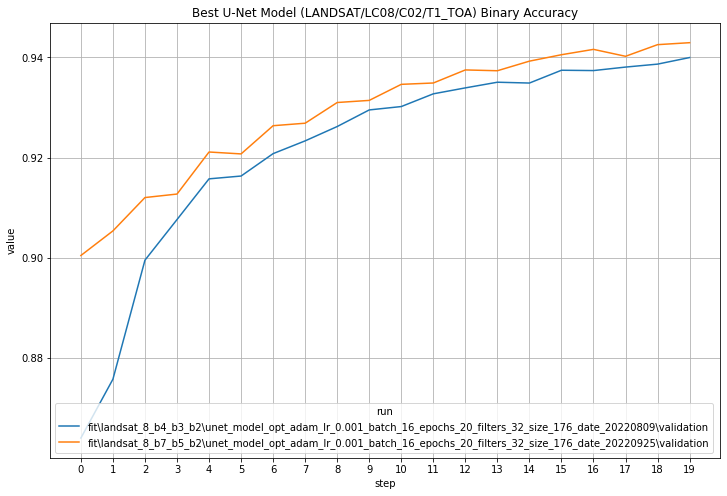

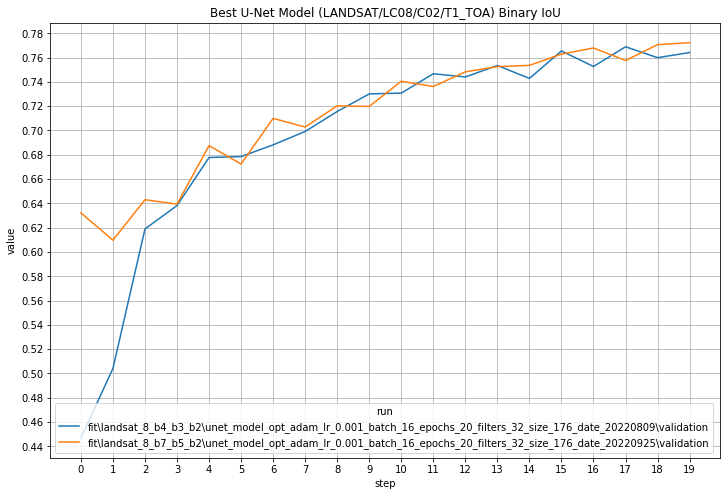

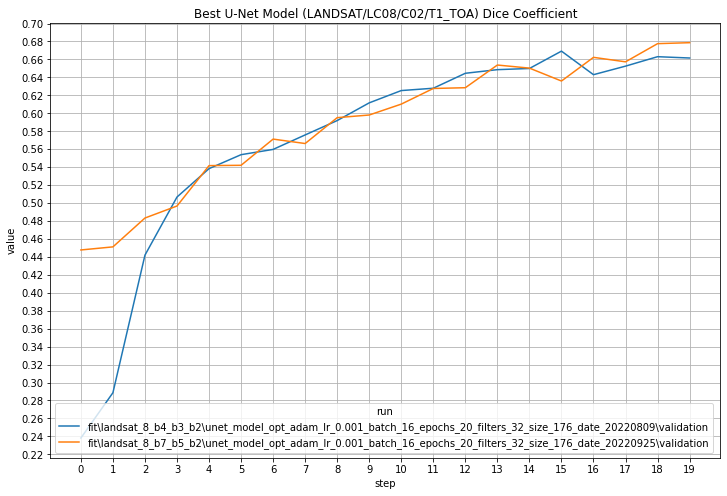

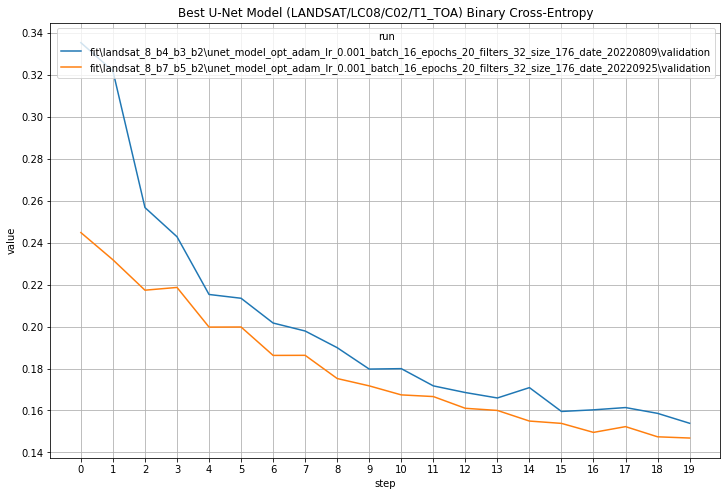

In [107]:
best_model_landsat_b4_b3_b2_logs = df_landsat_b4_b3_b2.loc[df_landsat_b4_b3_b2['run'] == df_best_models.iloc[0]['run']]
best_model_landsat_b7_b5_b2_logs = df_landsat_b7_b5_b2.loc[df_landsat_b7_b5_b2['run'] == df_best_models.iloc[1]['run']]
best_model_landsat_logs = pd.concat(
    [best_model_landsat_b4_b3_b2_logs,
    best_model_landsat_b7_b5_b2_logs],
    ignore_index=True,
)

metrics = {'epoch_accuracy': 'Binary Accuracy', 
           'epoch_binary_iou': 'Binary IoU', 
           'epoch_dice_coef': 'Dice Coefficient',
           'epoch_loss': 'Binary Cross-Entropy'}

for key, metric in metrics.items():
    type_run = 'validation'
    data = best_model_landsat_logs.loc[
        (best_model_landsat_logs.run.str.endswith(type_run)) & 
        (best_model_landsat_logs.tag==key)]
    
    plt.figure(figsize=(12, 8))
    plt.grid()
    plt.xticks(np.arange(data.step.min(), data.step.max()+1, 1))
    plt.yticks(np.arange(math.floor(data.value.min()), math.floor(data.value.max()+1), 0.02))
    sns.lineplot(data=data, x='step', y='value', hue='run', palette='tab10', ci=None)\
        .set_title('Best U-Net Model (LANDSAT/LC08/C02/T1_TOA) {}'.format(metric))
    plt.show()

## Best Model (Sentinel) Evaluation

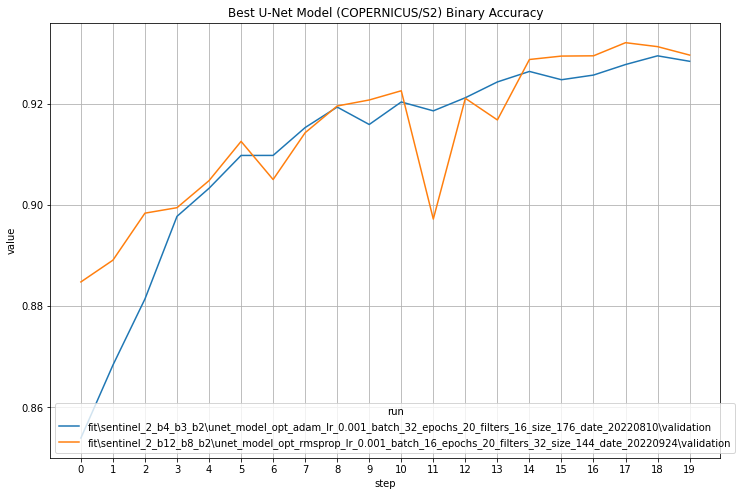

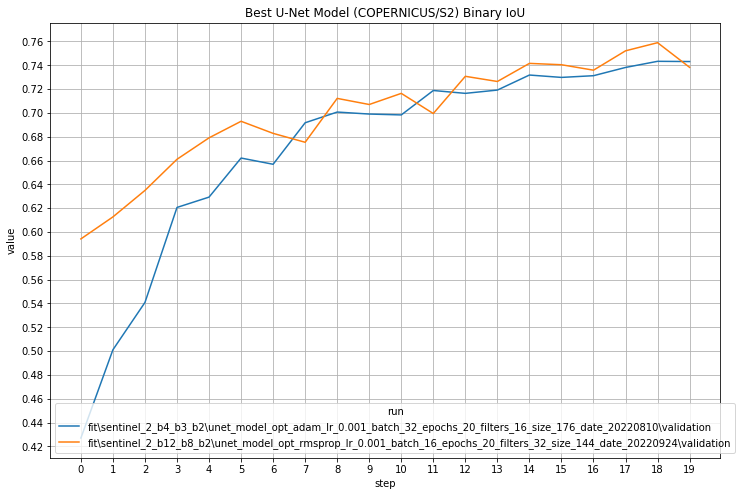

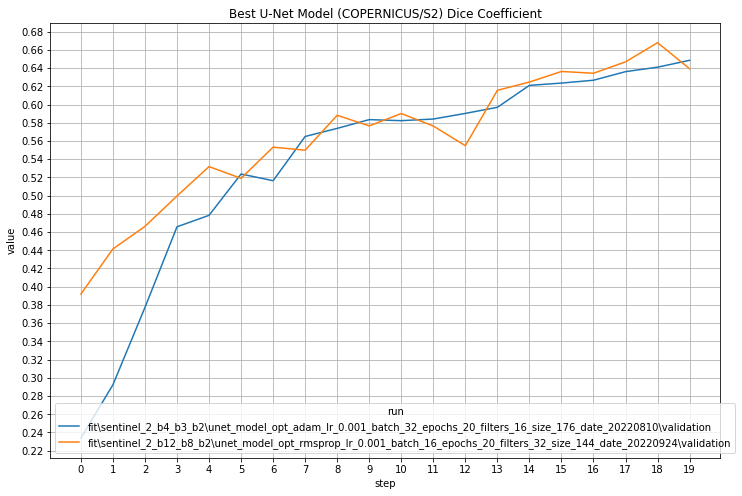

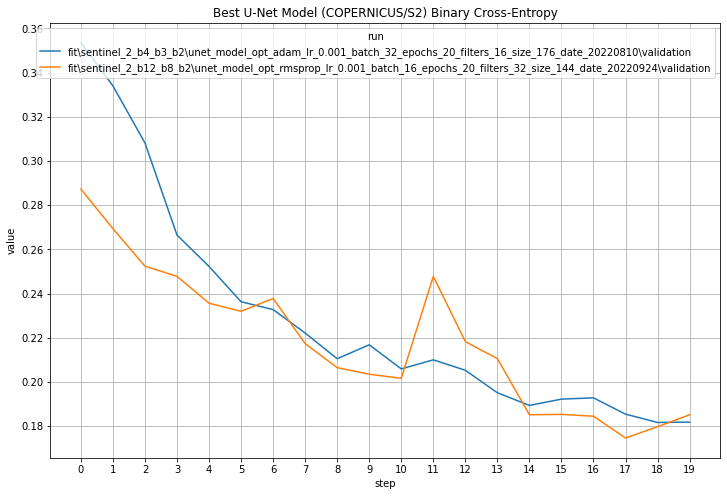

In [108]:
best_model_sentinel_b4_b3_b2_logs = df_sentinel_b4_b3_b2.loc[df_sentinel_b4_b3_b2['run'] == df_best_models.iloc[2]['run']]
best_model_sentinel_b12_b8_b2_logs = df_sentinel_b12_b8_b2.loc[df_sentinel_b12_b8_b2['run'] == df_best_models.iloc[3]['run']]
best_model_sentinel_logs = pd.concat(
    [best_model_sentinel_b4_b3_b2_logs,
    best_model_sentinel_b12_b8_b2_logs],
    ignore_index=True,
)

metrics = {'epoch_accuracy': 'Binary Accuracy', 
           'epoch_binary_iou': 'Binary IoU', 
           'epoch_dice_coef': 'Dice Coefficient',
           'epoch_loss': 'Binary Cross-Entropy'}

for key, metric in metrics.items():
    type_run = 'validation'
    data = best_model_sentinel_logs.loc[
        (best_model_sentinel_logs.run.str.endswith(type_run)) & 
        (best_model_sentinel_logs.tag==key)]
    
    plt.figure(figsize=(12, 8))
    plt.grid()
    plt.xticks(np.arange(data.step.min(), data.step.max()+1, 1))
    plt.yticks(np.arange(math.floor(data.value.min()), math.floor(data.value.max()+1), 0.02))
    sns.lineplot(data=data, x='step', y='value', hue='run', palette='tab10', ci=None)\
        .set_title('Best U-Net Model (COPERNICUS/S2) {}'.format(metric))
    plt.show()

# 3. Constants

In [111]:
landsat_b4_b3_b2_best_model.run.apply(lambda x: x.split('\\')[2]).values

array(['unet_model_opt_adam_lr_0.001_batch_16_epochs_20_filters_16_size_176_date_20220809',
       'unet_model_opt_adam_lr_0.001_batch_16_epochs_20_filters_32_size_176_date_20220809',
       'unet_model_opt_adam_lr_0.001_batch_32_epochs_20_filters_16_size_176_date_20220809',
       'unet_model_opt_adam_lr_0.001_batch_32_epochs_20_filters_32_size_176_date_20220809',
       'unet_model_opt_adam_lr_0.001_batch_64_epochs_20_filters_16_size_176_date_20220809',
       'unet_model_opt_adam_lr_0.001_batch_64_epochs_20_filters_32_size_144_date_20220810',
       'unet_model_opt_adam_lr_0.01_batch_16_epochs_20_filters_16_size_144_date_20220808',
       'unet_model_opt_adam_lr_0.01_batch_16_epochs_20_filters_32_size_112_date_20220809',
       'unet_model_opt_adam_lr_0.01_batch_32_epochs_20_filters_16_size_176_date_20220809',
       'unet_model_opt_adam_lr_0.01_batch_32_epochs_20_filters_32_size_144_date_20220809',
       'unet_model_opt_adam_lr_0.01_batch_64_epochs_20_filters_16_size_144_date_2022

In [150]:
RANDOM_STATE = 42
BATCH_SIZE = 32
CHANNEL = 3
SEED = RANDOM_STATE
AUTOTUNE = tf.data.experimental.AUTOTUNE
UNET_MODEL_LANDSAT_8_B4_B3_B2 = landsat_b4_b3_b2_best_model.run.apply(lambda x: x.split('\\')[2]).values
UNET_MODEL_LANDSAT_8_B7_B5_B2 = landsat_b7_b5_b2_best_model.run.apply(lambda x: x.split('\\')[2]).values
UNET_MODEL_SENTINEL_2_B4_B3_B2 = sentinel_b4_b3_b2_best_model.run.apply(lambda x: x.split('\\')[2]).values
UNET_MODEL_SENTINEL_2_B12_B8_B2 = sentinel_b12_b8_b2_best_model.run.apply(lambda x: x.split('\\')[2]).values

# 4. Prepare Functions for Evaluation

In [140]:
def parse_tfrecord_fn(example):
    """
    :param example: A scalar string Tensor (a single serialized example)
    :return: image and mask data in Tensor form
    """
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "mask": tf.io.FixedLenFeature([], tf.string),
        "height": tf.io.FixedLenFeature([], tf.int64),
        "width": tf.io.FixedLenFeature([], tf.int64),
        "label": tf.io.FixedLenFeature([], tf.int64),
    }
    example = tf.io.parse_single_example(example, feature_description)
    
    example["image"] = tf.io.decode_png(example["image"])
    img_arr = tf.reshape(example["image"], (example["height"], example["width"], CHANNEL))
    example["mask"] = tf.io.decode_png(example["mask"])
    mask = tf.reshape(example["mask"], (example["height"], example["width"], 1))
    
    return example["image"], example["mask"], example["label"] 

In [141]:
def normalize_image_mask(image, mask):
    """
    :param image: image in Tensor form
    :param mask: mask in Tensor form
    :return: normalized image and mask data in Tensor form
    """
    image = image/255
    mask = mask/255
    return tf.cast(image, tf.dtypes.float32), tf.cast(mask, tf.dtypes.uint8)

def resize_image_mask(image, mask, height, width):
    """
    :param image: image in Tensor form
    :param mask: mask in Tensor form
    :return: resized image and mask data in Tensor form
    """
    image = tf.image.resize(image, (height, width), method='nearest')
    mask = tf.image.resize(mask, (height, width), method='nearest')
    return image, mask

In [142]:
def get_test_dataset(dataset_path, height, width):
    # return list of tfrecords using glob
    files = glob.glob(os.path.join(dataset_path, '*.tfrec'), recursive=False)

    # shuffled the filse using random sample 
    random.seed(SEED)
    shuffled_files = random.sample(files, len(files))

    # split the shuffled file for train, validation, test
    len_dataset = len(shuffled_files)

    train_size = math.floor(0.6 * len_dataset)
    validation_size = math.ceil(0.2 * len_dataset)
    test_size = math.ceil(0.2 * len_dataset)

    train_files = shuffled_files[:train_size]
    validation_files = shuffled_files[train_size:train_size+validation_size]
    test_files = shuffled_files[train_size+validation_size:]

    # return a dataset consists of multiple files
    parsed_test_dataset = tf.data.TFRecordDataset(test_files, num_parallel_reads=AUTOTUNE).map(parse_tfrecord_fn)
    
    # resizing and normalization on the test dataset
    test_dataset = parsed_test_dataset.map(lambda image, mask, _: resize_image_mask(image, mask, height, width), 
                                           num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
    test_dataset = test_dataset.map(normalize_image_mask, num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
    test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
    return test_dataset

In [143]:
def dice_coef(y_true, y_pred):
    """
    :param y_true: tensors contain ground truth values
    :param y_pred: tensors contain predicted values
    :return: dice coefficient value
    """
    X = tf.cast(K.flatten(y_true), tf.dtypes.float32)
    Y = tf.cast(K.flatten(y_pred), tf.dtypes.float32)
    intersection = K.sum(X * Y)
    return 2 * intersection/ (K.sum(X) + K.sum(Y))


# 5. Evaluate U-Net Model 

In [144]:
def evaluate_model(root, unet_model_names, tf_folder_path):
    model_paths = []
    losses = [] 
    binary_accuracies = []
    dice_coeffs = []
    binary_ious = []

    for unet_model_name in unet_model_names:
        print(unet_model_name)
        model_path = os.path.join(root, unet_model_name)
        unet_model = tf.keras.models.load_model(model_path, custom_objects={'dice_coef': dice_coef})
        config = unet_model.get_config()
        _, height, width, _ = config["layers"][0]["config"]["batch_input_shape"]
        print(config["layers"][0]["config"]["batch_input_shape"])
        test_dataset = get_test_dataset(tf_folder_path, height, width)
        print(model_path)
        score = unet_model.evaluate(test_dataset, verbose = 1)
        print('Model Path:', model_path)
        print('Test Binary Cross-Entropy Loss:', score[0]) 
        print('Test Binary Accuracy:', score[1])
        print('Test Dice Coefficient:', score[2])
        print('Test Binary Intersection Over Union:', score[3]) 
        model_paths.append(model_path)
        losses.append(score[0])
        binary_accuracies.append(score[1])
        dice_coeffs.append(score[2])
        binary_ious.append(score[3])
    
    return pd.DataFrame({
        'model_paths': model_paths,
        'binary_crossentropy_loss': losses,
        'binary_accuracy': binary_accuracies,
        'dice_coefficient': dice_coeffs,
        'binary_iou': binary_ious,
    })

In [161]:
# df_evaluation = pd.DataFrame()
# df_evaluation = pd.concat([
#     df_evaluation, 
#     evaluate_model(
#         "models\\landsat_8_b4_b3_b2",
#         UNET_MODEL_LANDSAT_8_B4_B3_B2,
#         LANDSAT_8_B4_B3_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH
# )])

# df_evaluation = pd.concat([
#     df_evaluation, 
#     evaluate_model(
#         "models\\landsat_8_b7_b5_b2",
#         UNET_MODEL_LANDSAT_8_B7_B5_B2,
#         LANDSAT_8_B7_B5_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH
# )])

# df_evaluation = pd.concat([
#     df_evaluation, 
#     evaluate_model(
#         "models\\sentinel_2_b4_b3_b2",
#         UNET_MODEL_SENTINEL_2_B4_B3_B2,
#         SENTINEL_2_B4_B3_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH
# )])

# df_evaluation = pd.concat([
#     df_evaluation, 
#     evaluate_model(
#         "models\\sentinel_2_b12_b8_b2",
#         UNET_MODEL_SENTINEL_2_B12_B8_B2,
#         SENTINEL_2_B12_B8_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH
# )])

# df_evaluation.to_csv('evaluation.csv', index=False)

In [162]:
df_evaluation = pd.read_csv('evaluation.csv')

In [163]:
df_evaluation

,model_paths,binary_crossentropy_loss,binary_accuracy,dice_coefficient,binary_iou
0,models\landsat_8_b4_b3_b2\unet_model_opt_adam_...,0.175756,0.933370,0.638182,0.730232
1,models\landsat_8_b4_b3_b2\unet_model_opt_adam_...,0.159078,0.938236,0.663205,0.763118
2,models\landsat_8_b4_b3_b2\unet_model_opt_adam_...,0.170112,0.934740,0.633765,0.743112
3,models\landsat_8_b4_b3_b2\unet_model_opt_adam_...,0.162220,0.937486,0.650352,0.750218
4,models\landsat_8_b4_b3_b2\unet_model_opt_adam_...,0.175657,0.932490,0.628225,0.736392
5,models\landsat_8_b4_b3_b2\unet_model_opt_adam_...,0.193649,0.925583,0.576991,0.703816
6,models\landsat_8_b4_b3_b2\unet_model_opt_adam_...,0.303279,0.880948,0.321465,0.551595
7,models\landsat_8_b4_b3_b2\unet_model_opt_adam_...,0.398625,0.863932,0.142542,0.431966
8,models\landsat_8_b4_b3_b2\unet_model_opt_adam_...,0.306607,0.879888,0.344851,0.569958
9,models\landsat_8_b4_b3_b2\unet_model_opt_adam_...,0.308124,0.879734,0.328334,0.555161


In [158]:
def display_image_prediction(dataset, result_mask):
    for batch in dataset.take(1):
        n_rows = len(batch[0])
        n_cols = 3
        i = 0
        fig, axs = plt.subplots(n_rows, n_cols, figsize=(30, n_rows*10), sharey=True)
        for image, true_mask in zip(batch[0], batch[1]):
            image = tf.cast(image*255, tf.uint8)
            true_mask = tf.cast(true_mask*255, tf.uint8)
            predicted_mask = result_mask[i]
            axs[i, 0].imshow(image.numpy()*3)
            axs[i, 0].set_title('Image')
            axs[i, 1].imshow(true_mask.numpy())
            axs[i, 1].set_title('True Mask')
            axs[i, 2].imshow(predicted_mask)
            axs[i, 2].set_title('Predicted Mask')
            i+=1
        plt.show()

In [159]:
display_image_prediction(test_dataset, np_result)

NameError: name 'test_dataset' is not defined